
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

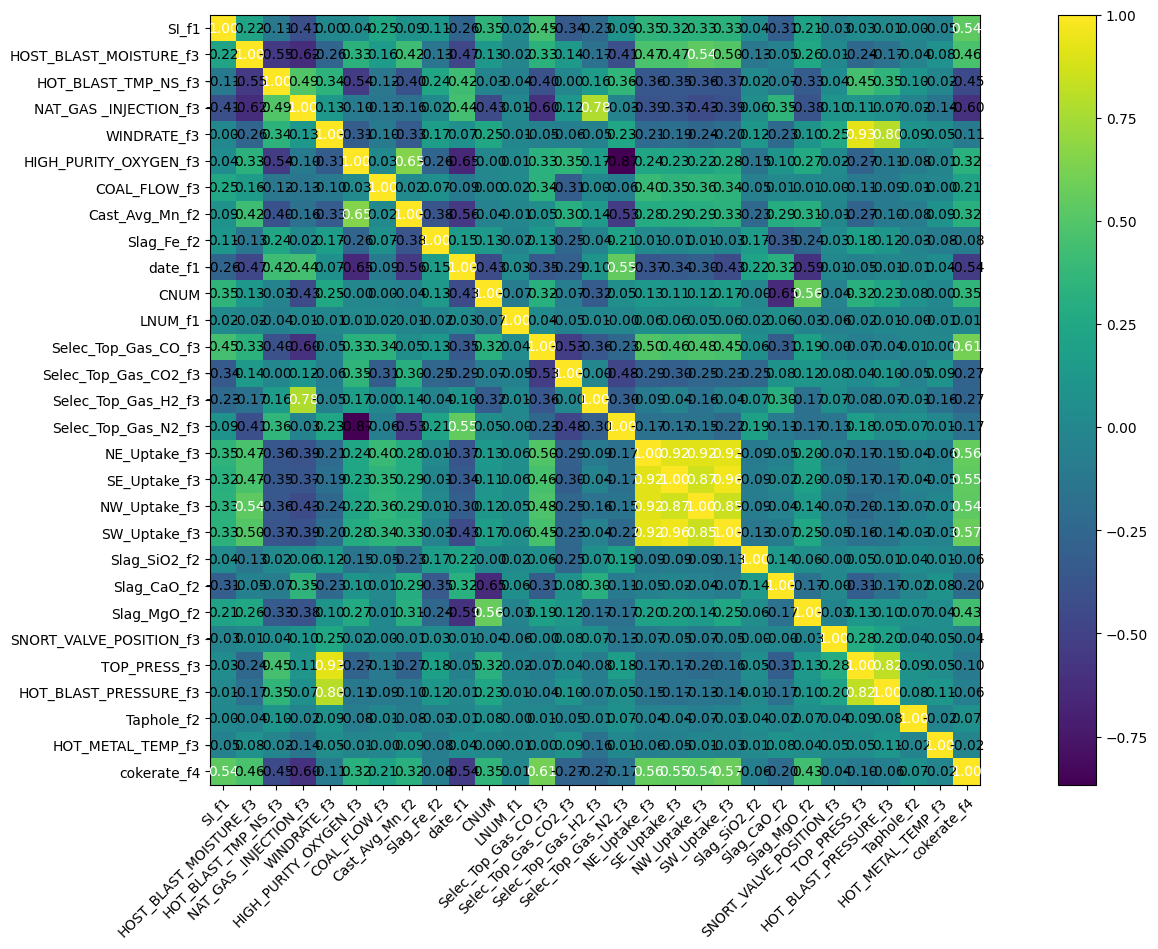

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

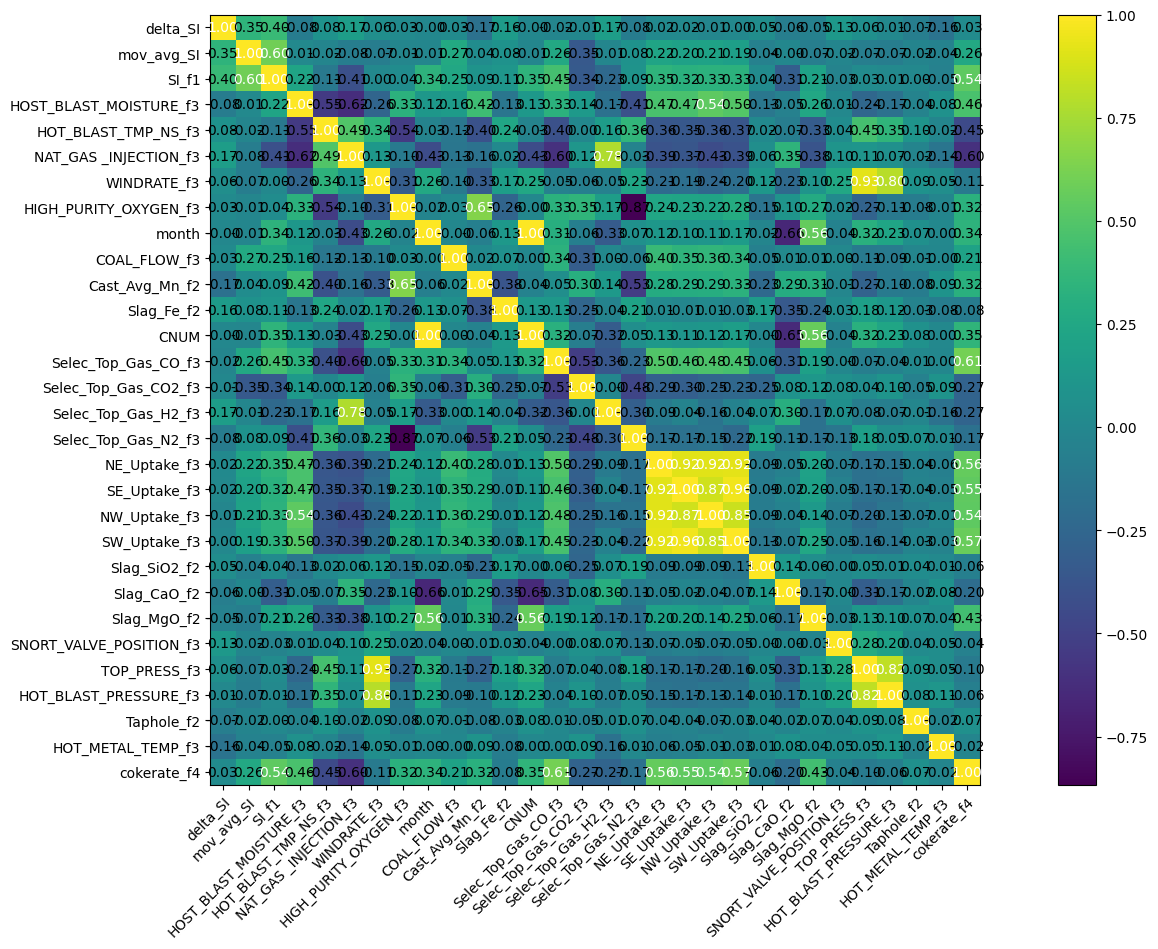

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.023744
Loss_SI: 1.0087554454803467 Loss_all: 1.158642053604126
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.095528
Loss_SI: 0.035289596766233444 Loss_all: 0.6376739144325256
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.070359
Loss_SI: 0.02830243855714798 Loss_all: 0.44886499643325806
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.048297
Loss_SI: 0.010038422420620918 Loss_all: 0.3926207721233368
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.044197
Loss_SI: 0.011802267283201218 Loss_all: 0.33574825525283813
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039097
Loss_SI: 0.009344372898340225 Loss_all: 0.30686745047569275
Prediction shape: torch.Size([32, 35])
===


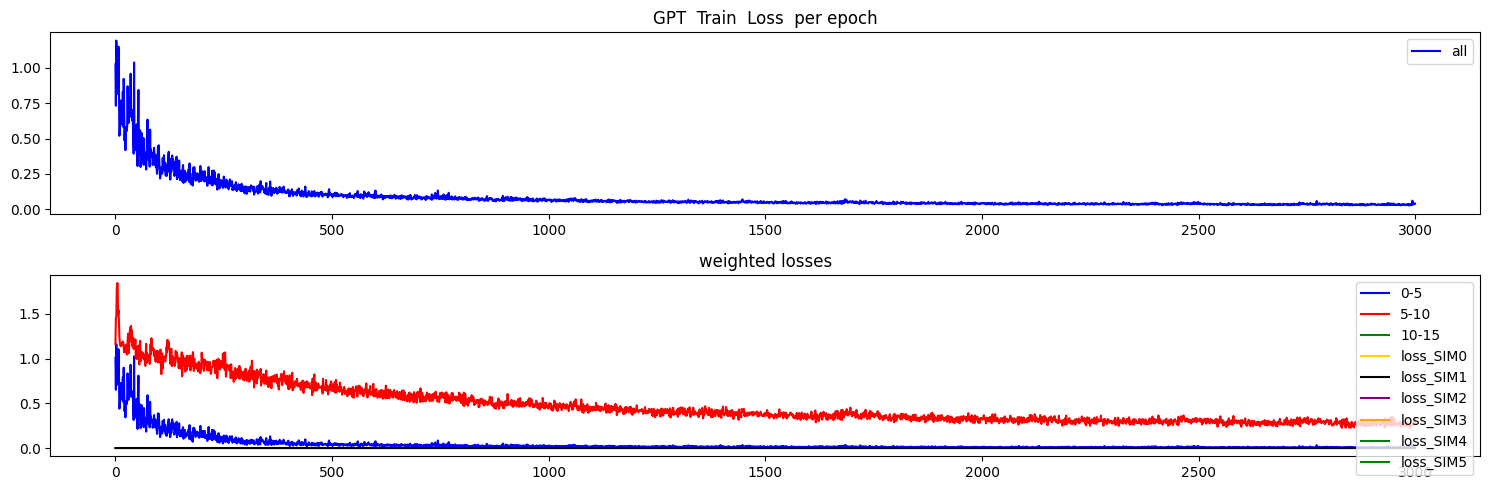

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


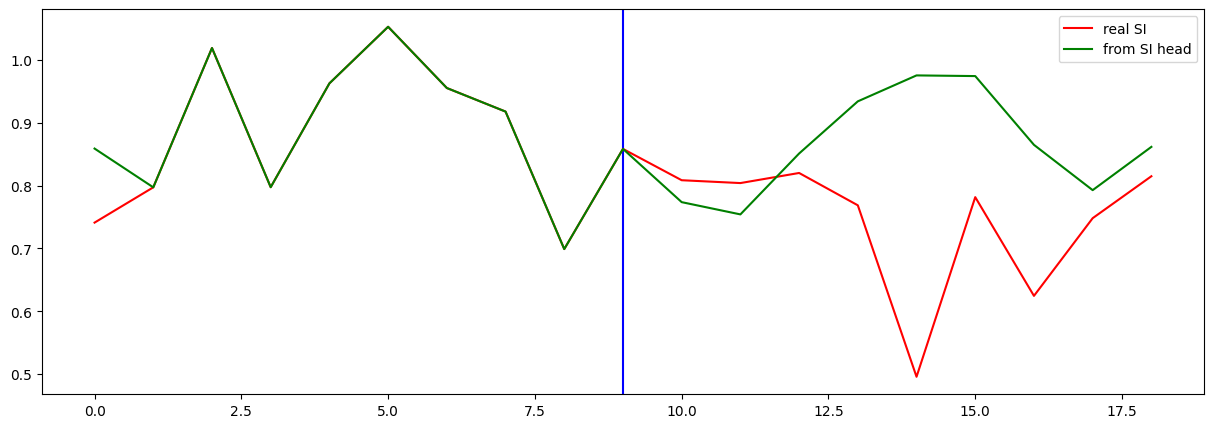

Testing R**2 - (all) - (no inputs):  0.9820556845254717
Testing R**2 - (f2) - SI full (no inputs):  -4.911349824686299
Testing R**2 - SI head only (no inputs):  -3.3003209410951113
0 ...index R**2 (no inputs):  -0.7795040189977631
1 ...index R**2 (no inputs):  -5.6042621630628355
2 ...index R**2 (no inputs):  -4.911349824686299
3 ...index R**2 (no inputs):  -34.504264481342794
4 ...index R**2 (no inputs):  -36.558450809062904
5 ...index R**2 (no inputs):  -3.5521930963542854
6 ...index R**2 (no inputs):  -3844.897855651803
7 ...index R**2 (no inputs):  -13285.665479102205
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5889545592141203
10 ...index R**2 (no inputs):  0.23008717805583634
11 ...index R**2 (no inputs):  -23.7414329890626
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8224133739614743
16 ...index R**2 (no inputs):  -1.7348282171380713
17 ...index R**2 (no inputs): 

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.330971
Loss_SI: 0.27330806851387024 Loss_all: 0.8499411344528198
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.094304
Loss_SI: 0.05906395614147186 Loss_all: 0.4114675521850586
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.060988
Loss_SI: 0.023126332089304924 Loss_all: 0.4017443060874939
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.045762
Loss_SI: 0.017599597573280334 Loss_all: 0.299223929643631
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.059779
Loss_SI: 0.02461467683315277 Loss_all: 0.3762538731098175
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.050050
Loss_SI: 0.008771611377596855 Loss_all: 0.4215506911277771
Prediction shape: torch.Size([32, 35])
===


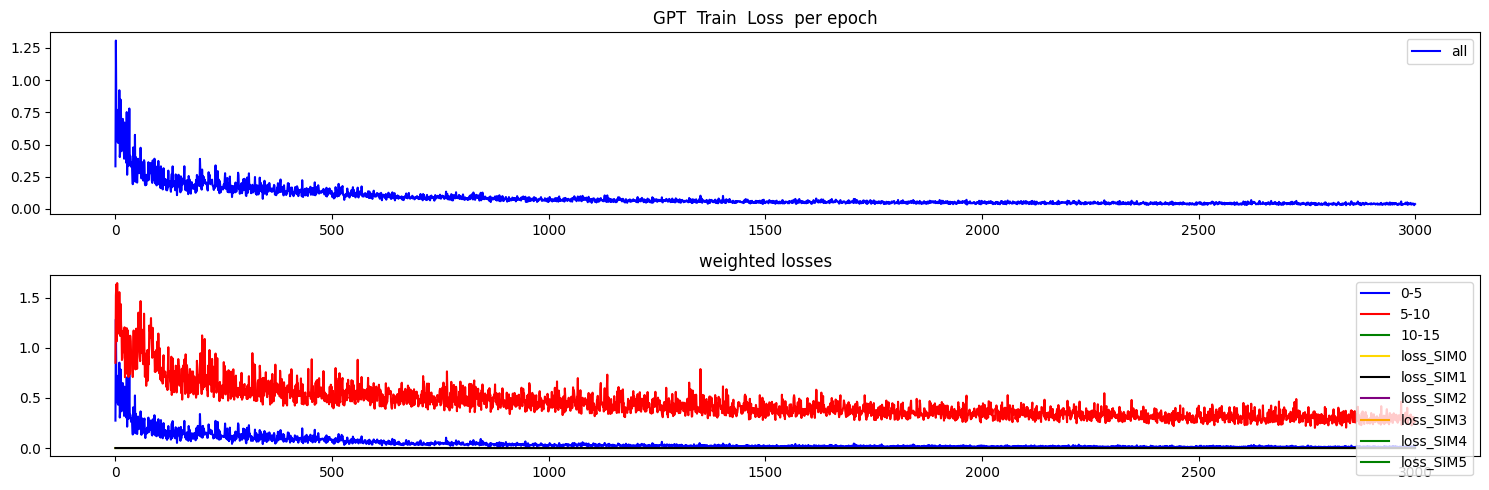

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


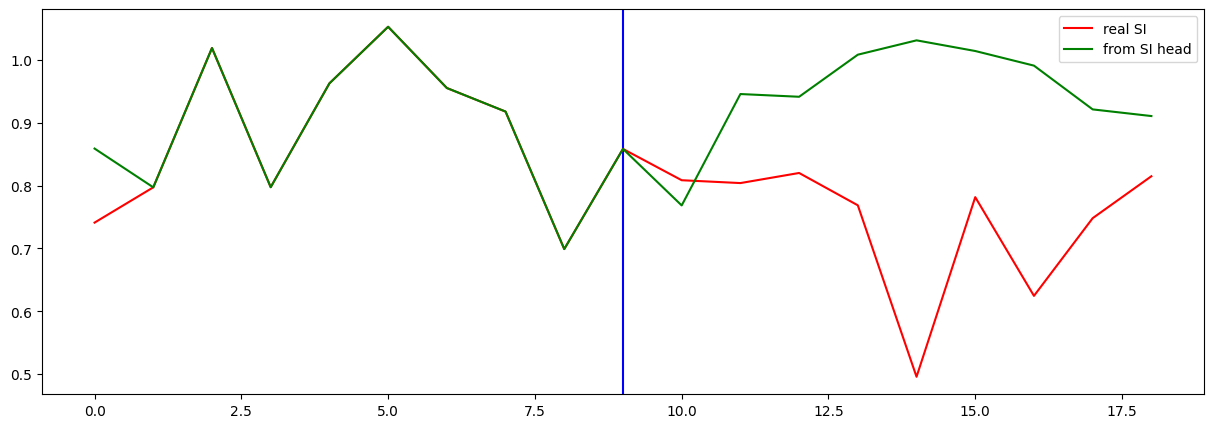

Testing R**2 - (all) - (no inputs):  0.9819906624967687
Testing R**2 - (f2) - SI full (no inputs):  -7.927099249641579
Testing R**2 - SI head only (no inputs):  -5.819286617861591
0 ...index R**2 (no inputs):  -0.4835844075083289
1 ...index R**2 (no inputs):  -7.248312124812964
2 ...index R**2 (no inputs):  -7.927099249641579
3 ...index R**2 (no inputs):  -17.27299332314481
4 ...index R**2 (no inputs):  -894.2432391356332
5 ...index R**2 (no inputs):  -3.551234874770599
6 ...index R**2 (no inputs):  -8125.917525342712
7 ...index R**2 (no inputs):  -11752.754688507353
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1996022107611226
10 ...index R**2 (no inputs):  -0.7577509164412517
11 ...index R**2 (no inputs):  -287.82520437530974
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.366248148760163
16 ...index R**2 (no inputs):  -1.1628147135909077
17 ...index R**2 (no inputs):  -25

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.472634
Loss_SI: 0.40446051955223083 Loss_all: 1.0861907005310059
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.173396
Loss_SI: 0.13107675313949585 Loss_all: 0.554271936416626
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.147494
Loss_SI: 0.08050257712602615 Loss_all: 0.7504121661186218
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.172131
Loss_SI: 0.10444040596485138 Loss_all: 0.7813445329666138
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.142854
Loss_SI: 0.08699466288089752 Loss_all: 0.6455854773521423
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.068013
Loss_SI: 0.027619626373052597 Loss_all: 0.4315488040447235
Prediction shape: torch.Size([32, 35])
===


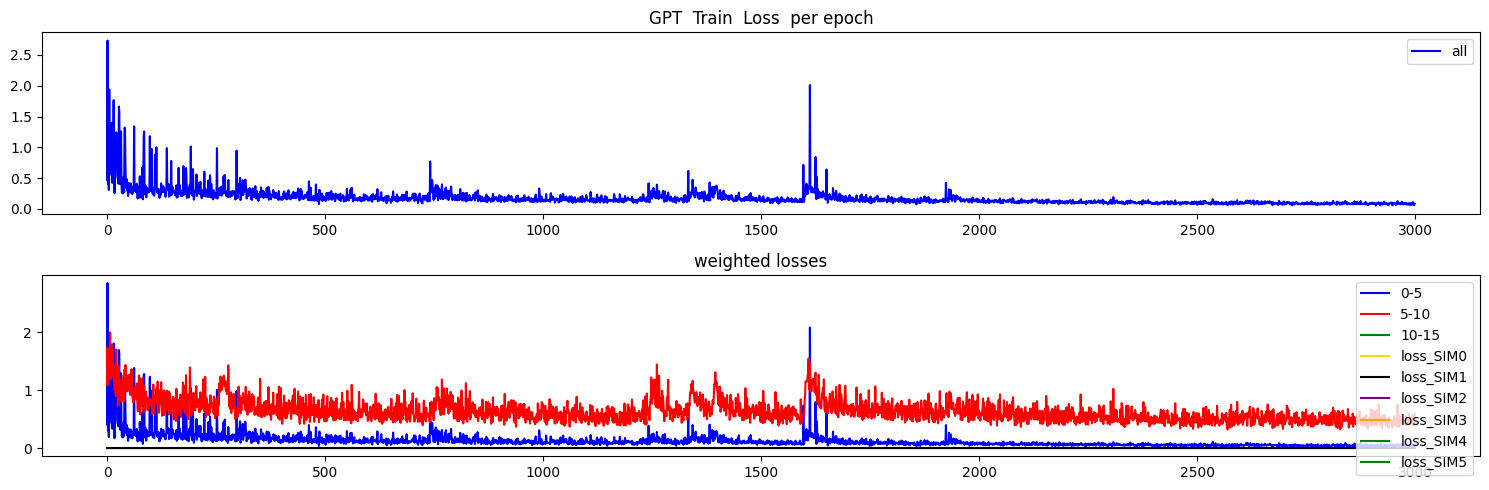

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


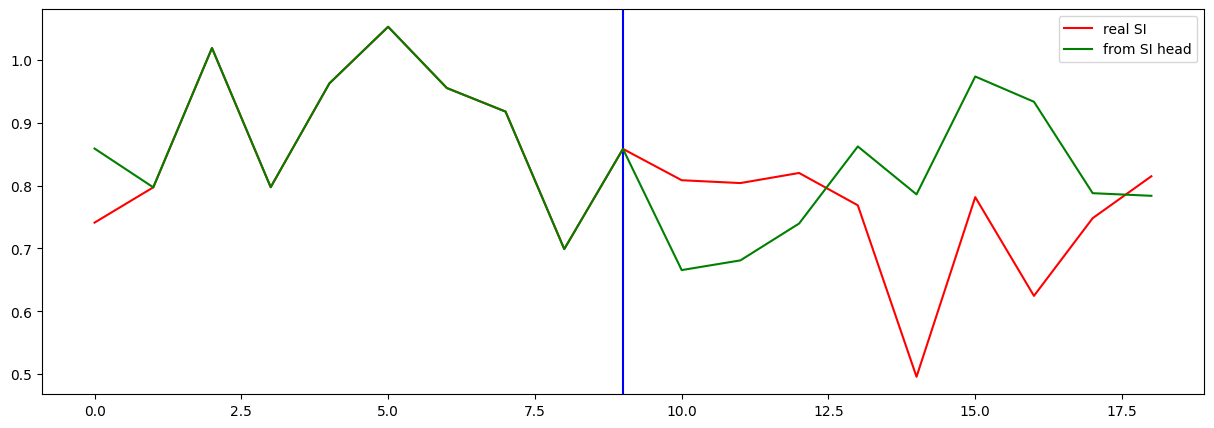

Testing R**2 - (all) - (no inputs):  0.9896927700716543
Testing R**2 - (f2) - SI full (no inputs):  -1.362933315203053
Testing R**2 - SI head only (no inputs):  -2.640661421341631
0 ...index R**2 (no inputs):  -0.20700440740416615
1 ...index R**2 (no inputs):  0.18577997911207922
2 ...index R**2 (no inputs):  -1.362933315203053
3 ...index R**2 (no inputs):  -42.24305142156352
4 ...index R**2 (no inputs):  -2285.4674803522503
5 ...index R**2 (no inputs):  -1.5743235914890068
6 ...index R**2 (no inputs):  -1664.120056959374
7 ...index R**2 (no inputs):  -16146.23059981253
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5853371777968253
10 ...index R**2 (no inputs):  0.2855024938988079
11 ...index R**2 (no inputs):  -917.4145794953124
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.01916623569348319
16 ...index R**2 (no inputs):  -0.13299135912504423
17 ...index R**2 (no inputs): 

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.671921
Loss_SI: 0.6109843850135803 Loss_all: 1.2203459739685059
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.184163
Loss_SI: 0.13255859911441803 Loss_all: 0.6486019492149353
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.157376
Loss_SI: 0.11903141438961029 Loss_all: 0.5024734735488892
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.102531
Loss_SI: 0.042964912950992584 Loss_all: 0.6386229395866394
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.097249
Loss_SI: 0.05401972308754921 Loss_all: 0.4863148629665375
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.127327
Loss_SI: 0.08648326992988586 Loss_all: 0.49491778016090393
Prediction shape: torch.Size([32, 35])
===


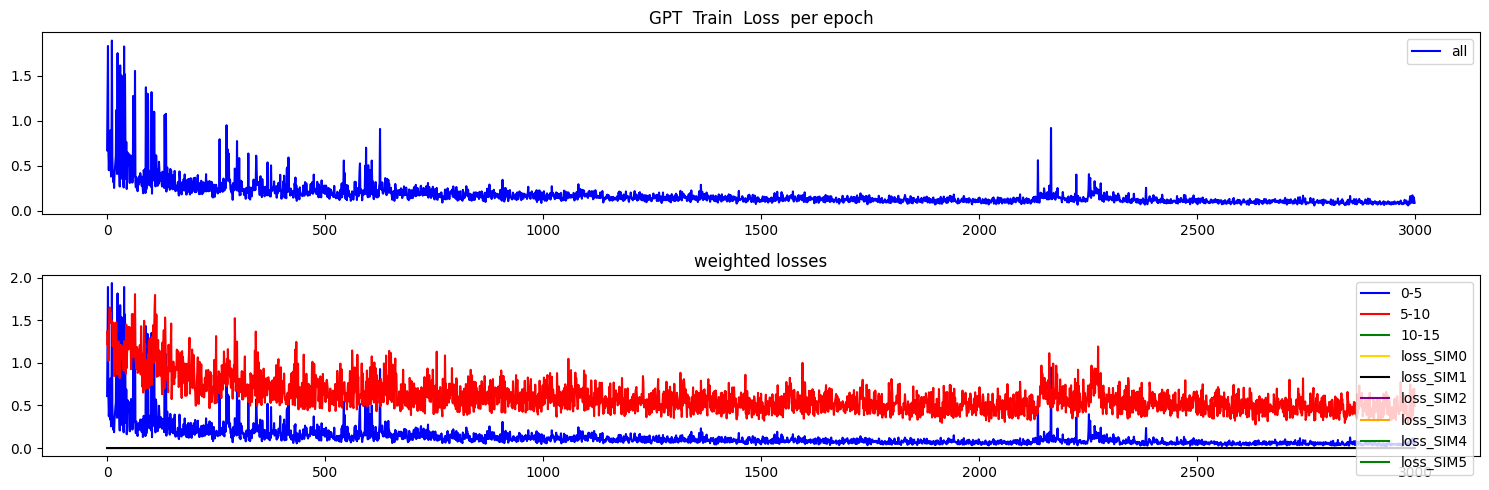

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


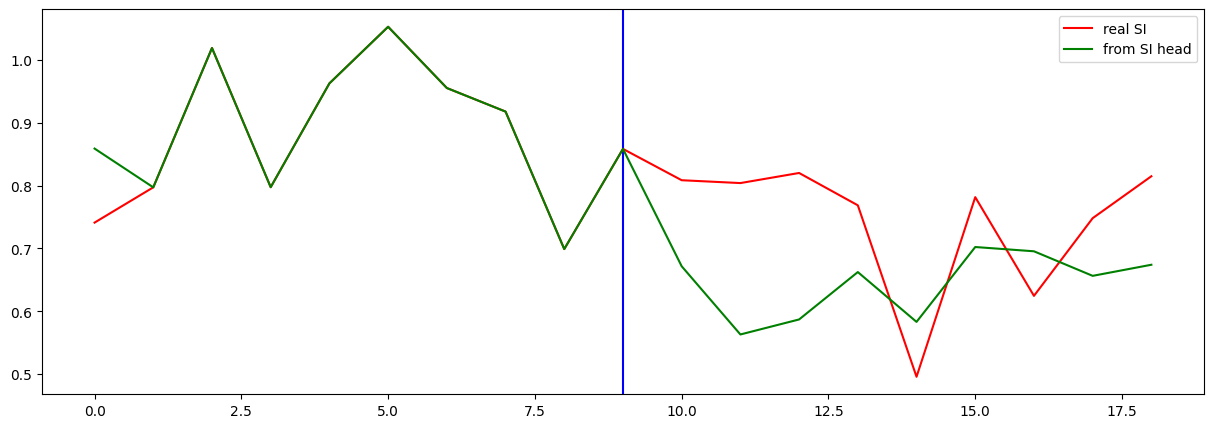

Testing R**2 - (all) - (no inputs):  0.8781577111374057
Testing R**2 - (f2) - SI full (no inputs):  -0.18134598492207332
Testing R**2 - SI head only (no inputs):  -1.433191447066534
0 ...index R**2 (no inputs):  -0.6831778784868507
1 ...index R**2 (no inputs):  -0.5043505806898274
2 ...index R**2 (no inputs):  -0.18134598492207332
3 ...index R**2 (no inputs):  -58.29449269163275
4 ...index R**2 (no inputs):  -504.76786863516026
5 ...index R**2 (no inputs):  -19.35998242953604
6 ...index R**2 (no inputs):  -874.5000358077
7 ...index R**2 (no inputs):  -1834267.8667770901
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.13344823658089444
10 ...index R**2 (no inputs):  -0.2865325523574911
11 ...index R**2 (no inputs):  -823.2031238832424
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3576399793468714
16 ...index R**2 (no inputs):  -4.605491470833102
17 ...index R**2 (no inputs):  

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.543498
Loss_SI: 0.47440820932388306 Loss_all: 1.165310263633728
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.077374
Loss_SI: 0.02514113485813141 Loss_all: 0.5474691390991211
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.054103
Loss_SI: 0.02262972854077816 Loss_all: 0.3373638987541199
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.074388
Loss_SI: 0.044594377279281616 Loss_all: 0.3425326347351074
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.046100
Loss_SI: 0.013397956266999245 Loss_all: 0.34041905403137207
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.032545
Loss_SI: 0.007590745575726032 Loss_all: 0.2571328580379486
Prediction shape: torch.Size([32, 35])
===


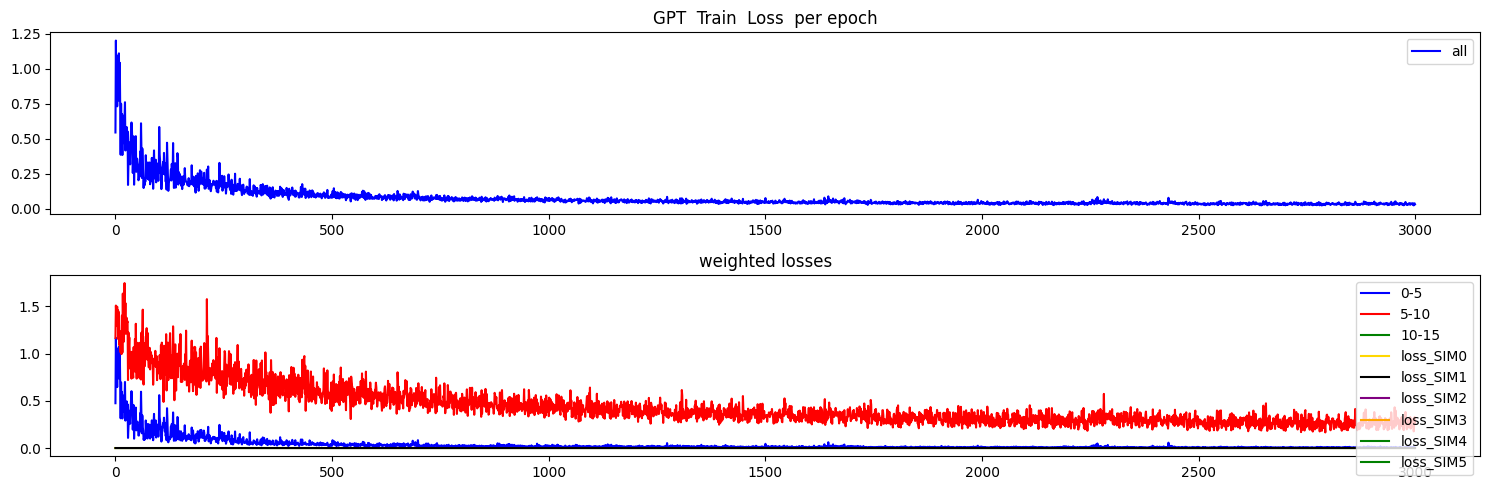

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


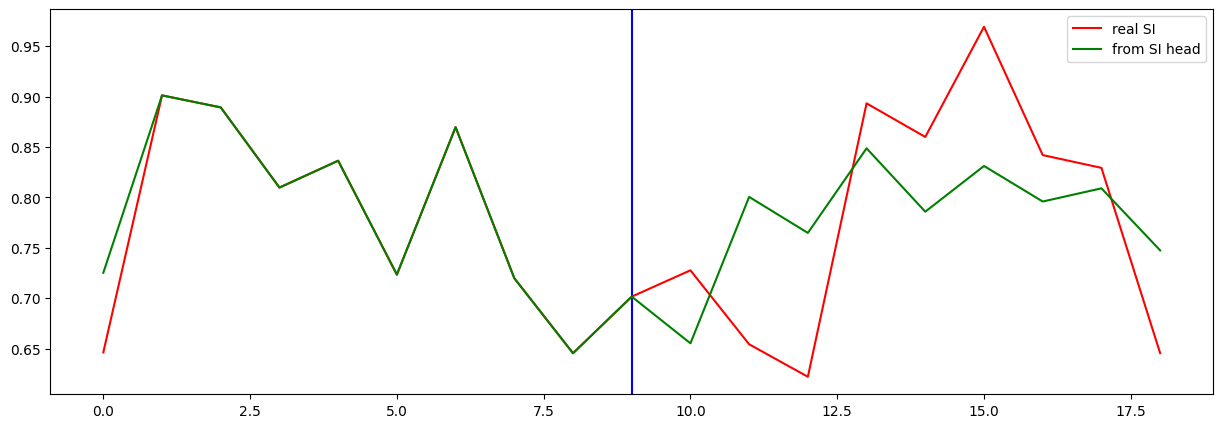

Testing R**2 - (all) - (no inputs):  0.9995091196852
Testing R**2 - (f2) - SI full (no inputs):  -0.7695843881878435
Testing R**2 - SI head only (no inputs):  0.12591827040134373
0 ...index R**2 (no inputs):  -0.2169187847489078
1 ...index R**2 (no inputs):  -3.397915358118265
2 ...index R**2 (no inputs):  -0.7695843881878435
3 ...index R**2 (no inputs):  -8.949524870519086
4 ...index R**2 (no inputs):  -0.44717922306059776
5 ...index R**2 (no inputs):  -52.762163258238495
6 ...index R**2 (no inputs):  -0.07236063305306839
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4759282577714139
10 ...index R**2 (no inputs):  -0.37161596769988114
11 ...index R**2 (no inputs):  -107.68890999792725
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.4426728946405163
16 ...index R**2 (no inputs):  -3.9231159799707482
17 ...index R**2 (no inputs):  -64.59631754

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.548942
Loss_SI: 0.4826931655406952 Loss_all: 1.1451830863952637
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.149452
Loss_SI: 0.07750676572322845 Loss_all: 0.7969567179679871
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.094652
Loss_SI: 0.031761132180690765 Loss_all: 0.660674512386322
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.088451
Loss_SI: 0.03076738305389881 Loss_all: 0.6076015830039978
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.079450
Loss_SI: 0.02716568298637867 Loss_all: 0.5500085353851318
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.057087
Loss_SI: 0.01916380412876606 Loss_all: 0.39839228987693787
Prediction shape: torch.Size([32, 35])
===


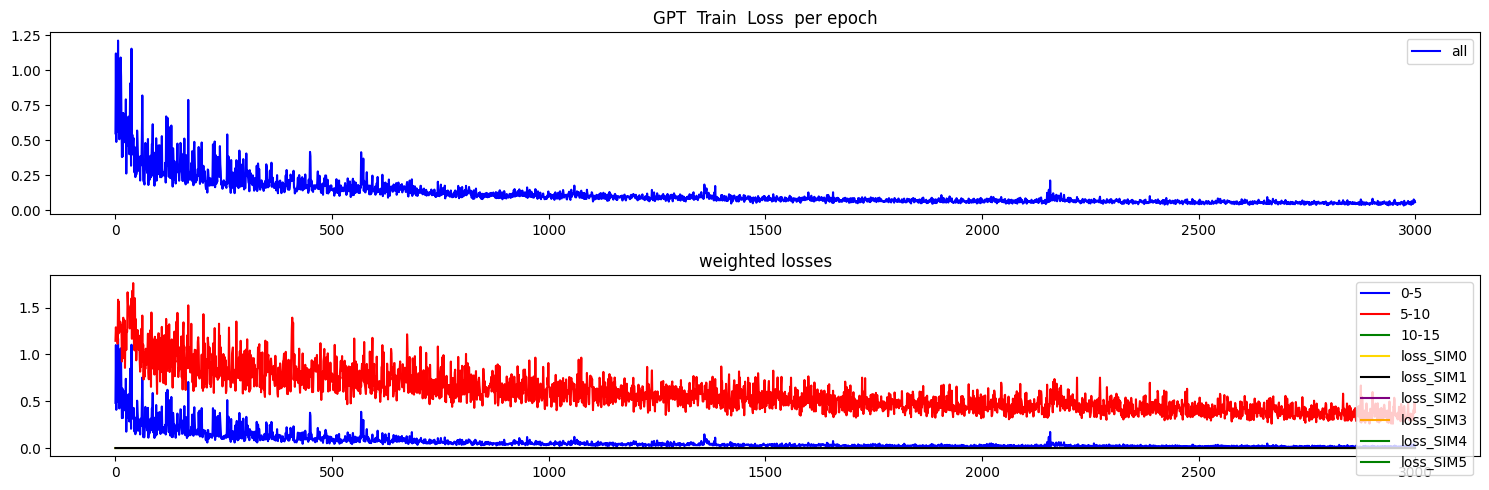

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


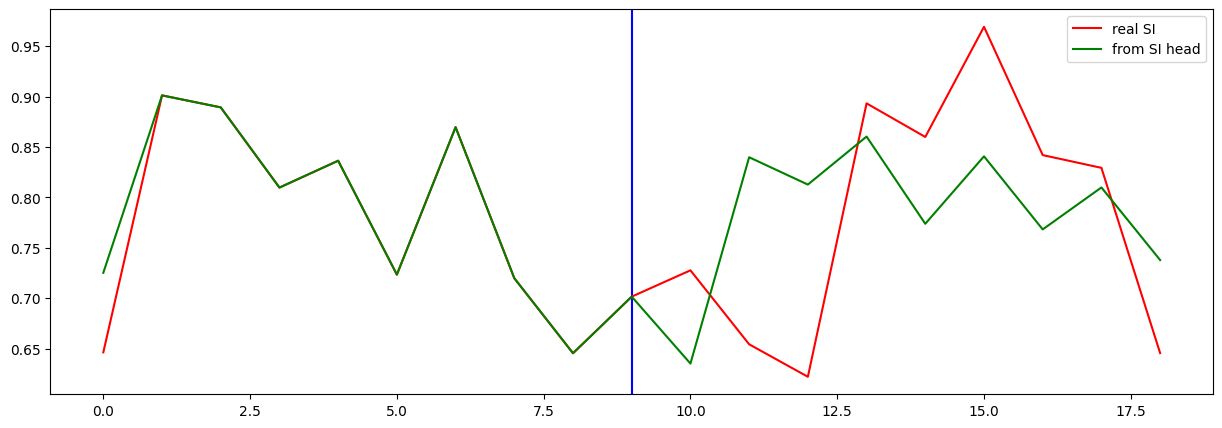

Testing R**2 - (all) - (no inputs):  0.9992768811744405
Testing R**2 - (f2) - SI full (no inputs):  -2.547952099225901
Testing R**2 - SI head only (no inputs):  0.043991499253223876
0 ...index R**2 (no inputs):  -0.5013414559676725
1 ...index R**2 (no inputs):  -1.1880509711732326
2 ...index R**2 (no inputs):  -2.547952099225901
3 ...index R**2 (no inputs):  -25.449446775996943
4 ...index R**2 (no inputs):  -0.4158768497621874
5 ...index R**2 (no inputs):  -83.1302746397245
6 ...index R**2 (no inputs):  -0.4892440126812587
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12281303892876849
10 ...index R**2 (no inputs):  -0.22955567026891588
11 ...index R**2 (no inputs):  -67.28666893659782
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.221116386007543
16 ...index R**2 (no inputs):  -2.2349360078179927
17 ...index R**2 (no inputs):  -14.458053967

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.504007
Loss_SI: 0.4114357531070709 Loss_all: 1.3371506929397583
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.253946
Loss_SI: 0.1911585032939911 Loss_all: 0.8190349340438843
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.171631
Loss_SI: 0.09047109633684158 Loss_all: 0.9020715951919556
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.134862
Loss_SI: 0.06634394824504852 Loss_all: 0.7515202164649963
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.085575
Loss_SI: 0.039419688284397125 Loss_all: 0.5009686946868896
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076558
Loss_SI: 0.035739995539188385 Loss_all: 0.443917840719223
Prediction shape: torch.Size([32, 35])
===


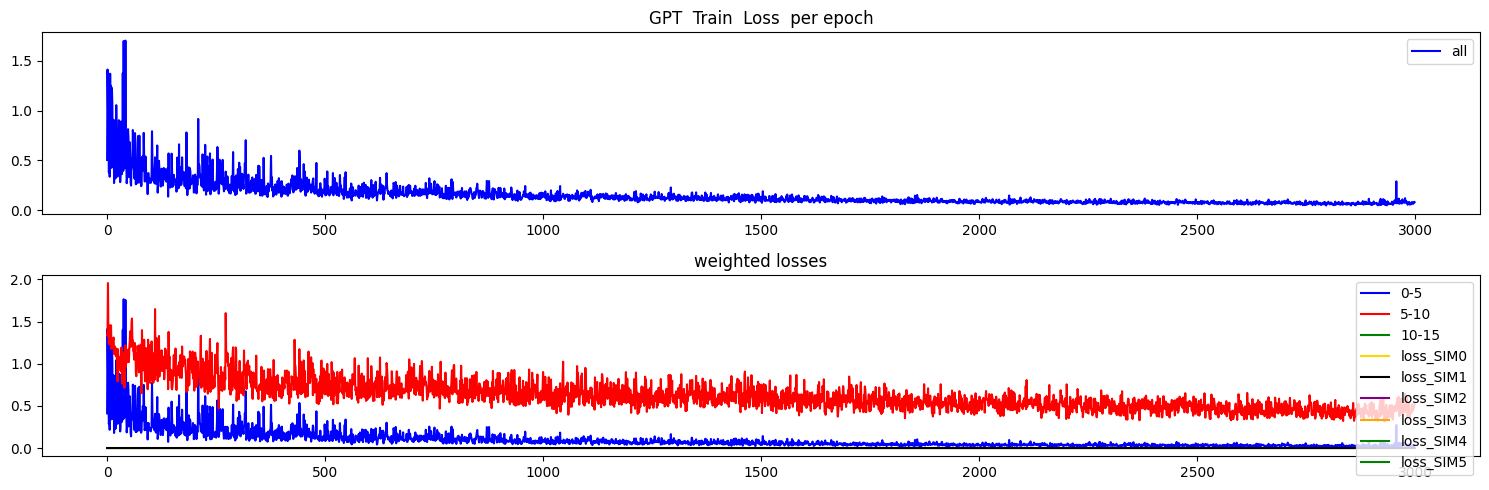

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


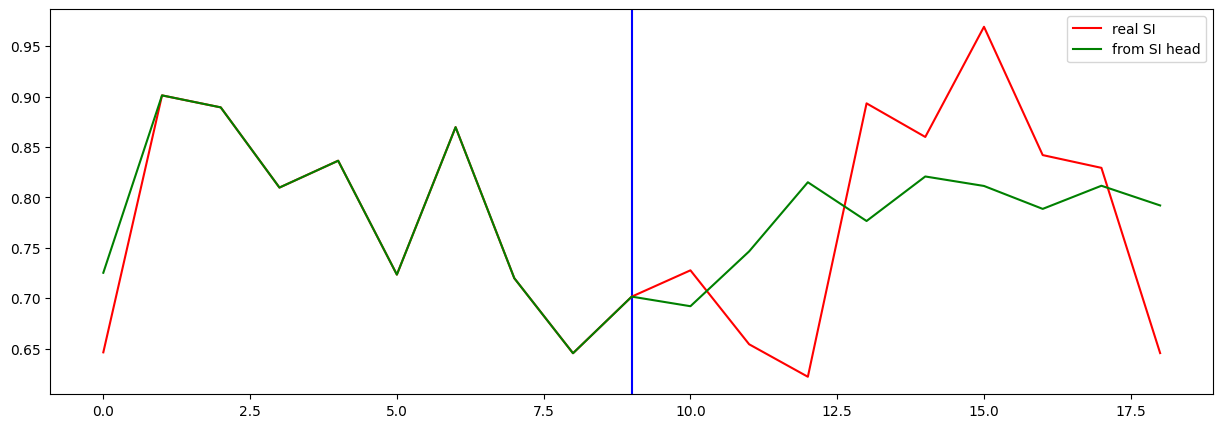

Testing R**2 - (all) - (no inputs):  0.9908478461977136
Testing R**2 - (f2) - SI full (no inputs):  -0.09378667189669354
Testing R**2 - SI head only (no inputs):  0.24862875406935359
0 ...index R**2 (no inputs):  -0.11072439633227482
1 ...index R**2 (no inputs):  -1.216719151283828
2 ...index R**2 (no inputs):  -0.09378667189669354
3 ...index R**2 (no inputs):  -81.16249164265203
4 ...index R**2 (no inputs):  -7.614727839012524
5 ...index R**2 (no inputs):  -1125.1711861645717
6 ...index R**2 (no inputs):  -0.4578071234751906
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24851918230413017
10 ...index R**2 (no inputs):  -0.5577180519004137
11 ...index R**2 (no inputs):  -4.081507518216372
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.951862213382177
16 ...index R**2 (no inputs):  -0.23135838150359644
17 ...index R**2 (no inputs):  -877.08403

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.593960
Loss_SI: 0.5028208494186401 Loss_all: 1.4142082929611206
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.282822
Loss_SI: 0.19648204743862152 Loss_all: 1.0598773956298828
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.155559
Loss_SI: 0.10050347447395325 Loss_all: 0.6510621905326843
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.134655
Loss_SI: 0.0789467915892601 Loss_all: 0.6360240578651428
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.092329
Loss_SI: 0.041528984904289246 Loss_all: 0.5495310425758362
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.087611
Loss_SI: 0.041642166674137115 Loss_all: 0.501335084438324
Prediction shape: torch.Size([32, 35])
===


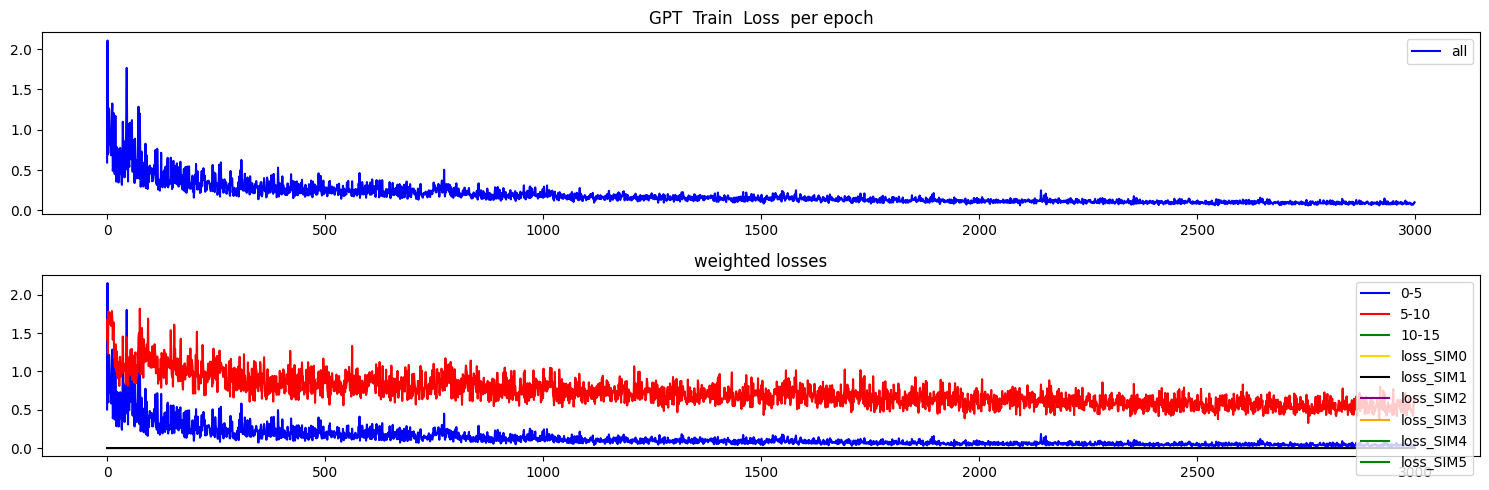

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


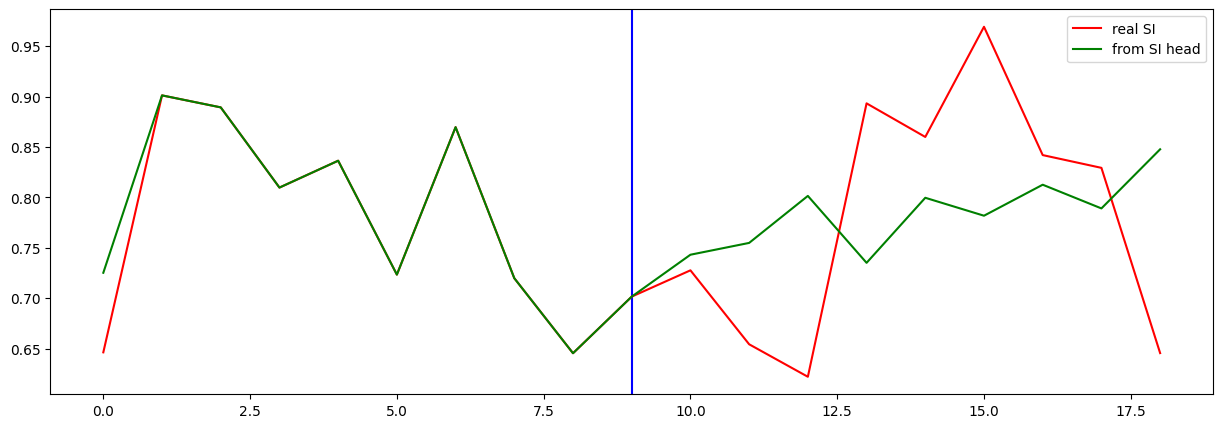

Testing R**2 - (all) - (no inputs):  0.9968028123650222
Testing R**2 - (f2) - SI full (no inputs):  -0.29820044321814176
Testing R**2 - SI head only (no inputs):  -0.041758634678414897
0 ...index R**2 (no inputs):  -0.3818131783016765
1 ...index R**2 (no inputs):  -1.0433776358394922
2 ...index R**2 (no inputs):  -0.29820044321814176
3 ...index R**2 (no inputs):  -43.3332539920404
4 ...index R**2 (no inputs):  -5.914677300540138
5 ...index R**2 (no inputs):  -329.94603395691314
6 ...index R**2 (no inputs):  -2.01625668875752
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.07936825322589836
10 ...index R**2 (no inputs):  -0.4457843137822499
11 ...index R**2 (no inputs):  -1123.3247093279886
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.48216743965571696
16 ...index R**2 (no inputs):  -0.31856662680027625
17 ...index R**2 (no inputs):  -4621.55

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.621415
Loss_SI: 0.5415087342262268 Loss_all: 1.3405765295028687
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.126177
Loss_SI: 0.05244630575180054 Loss_all: 0.7897506356239319
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.069531
Loss_SI: 0.02021743729710579 Loss_all: 0.513351559638977
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050373
Loss_SI: 0.01447601430118084 Loss_all: 0.3734493553638458
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.041621
Loss_SI: 0.010287031531333923 Loss_all: 0.3236232101917267
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.038678
Loss_SI: 0.008073680102825165 Loss_all: 0.3141128122806549
Prediction shape: torch.Size([32, 35])
===


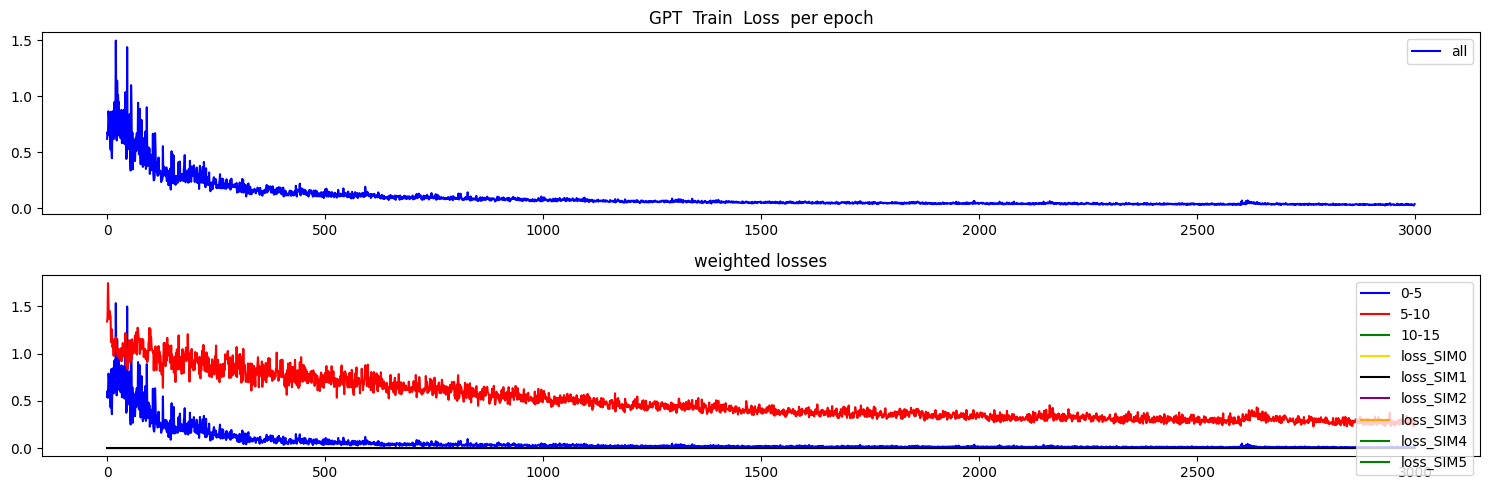

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


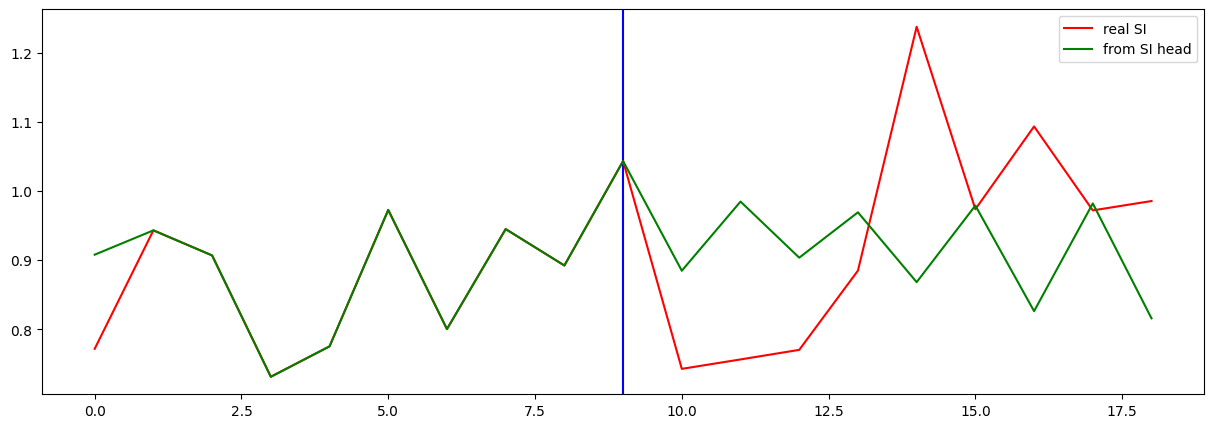

Testing R**2 - (all) - (no inputs):  0.9948609445155591
Testing R**2 - (f2) - SI full (no inputs):  0.2716521184783034
Testing R**2 - SI head only (no inputs):  0.1327624561840457
0 ...index R**2 (no inputs):  0.42702033183142085
1 ...index R**2 (no inputs):  0.07512441713576223
2 ...index R**2 (no inputs):  0.2716521184783034
3 ...index R**2 (no inputs):  -7.492843909517097
4 ...index R**2 (no inputs):  -0.2376351011743636
5 ...index R**2 (no inputs):  -53.559698589117765
6 ...index R**2 (no inputs):  -4.413985935914469
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08993740306811238
10 ...index R**2 (no inputs):  -0.3210990101589488
11 ...index R**2 (no inputs):  -7.428191879927976
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.65691963240488
16 ...index R**2 (no inputs):  0.015262250322063409
17 ...index R**2 (no inputs):  -59.177680973185

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.572446
Loss_SI: 0.5085788369178772 Loss_all: 1.1472502946853638
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.136688
Loss_SI: 0.05922733247280121 Loss_all: 0.8338326215744019
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.083567
Loss_SI: 0.026634028181433678 Loss_all: 0.5959609746932983
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.080898
Loss_SI: 0.027745041996240616 Loss_all: 0.5592778921127319
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.071920
Loss_SI: 0.02786315232515335 Loss_all: 0.4684355854988098
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.053140
Loss_SI: 0.017528831958770752 Loss_all: 0.3736388385295868
Prediction shape: torch.Size([32, 35])
===


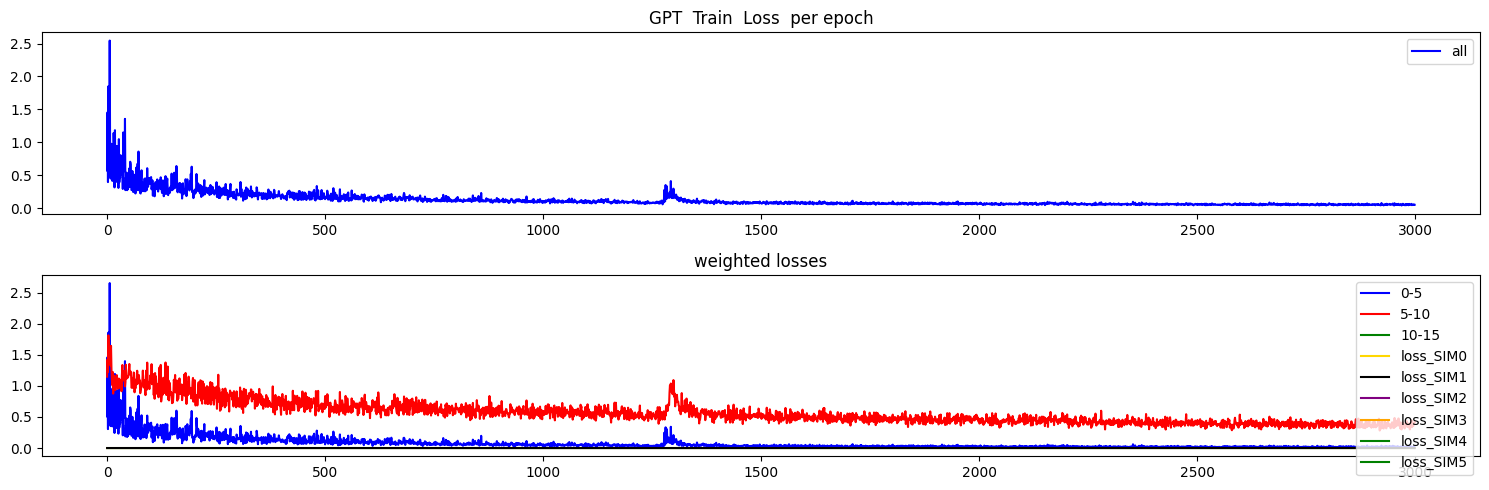

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


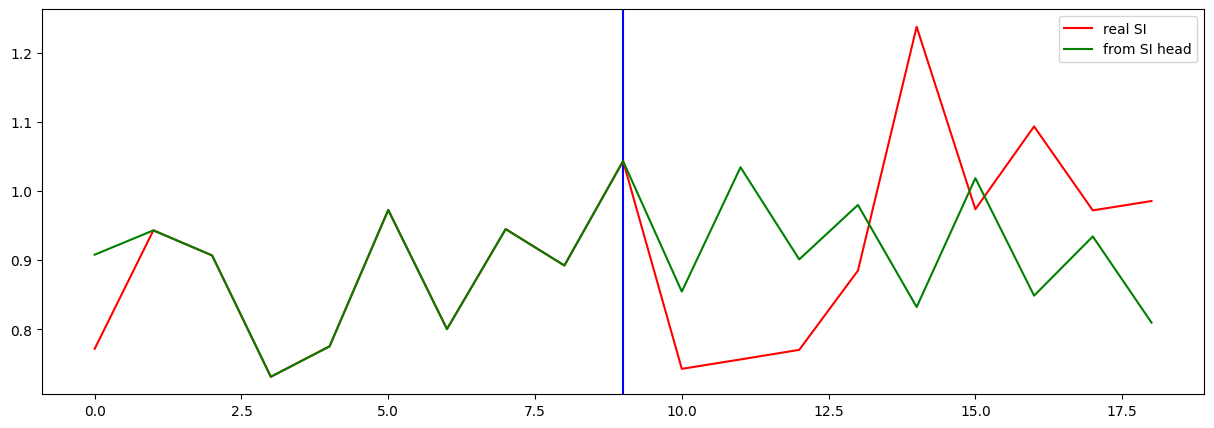

Testing R**2 - (all) - (no inputs):  0.9928445536654162
Testing R**2 - (f2) - SI full (no inputs):  0.05918772256547533
Testing R**2 - SI head only (no inputs):  0.09140553419116493
0 ...index R**2 (no inputs):  -0.1595457918542449
1 ...index R**2 (no inputs):  -0.05032688054074441
2 ...index R**2 (no inputs):  0.05918772256547533
3 ...index R**2 (no inputs):  -12.350190283691228
4 ...index R**2 (no inputs):  -2.826924463630663
5 ...index R**2 (no inputs):  -75.19098196028175
6 ...index R**2 (no inputs):  -6.821598970900188
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.40282889307863945
10 ...index R**2 (no inputs):  -0.842728168199568
11 ...index R**2 (no inputs):  -7.225386430841166
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.4300253229856486
16 ...index R**2 (no inputs):  -0.3150231185072343
17 ...index R**2 (no inputs):  -33.135771770

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.533199
Loss_SI: 0.4653583765029907 Loss_all: 1.1437638998031616
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.356067
Loss_SI: 0.30054593086242676 Loss_all: 0.8557584881782532
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.170025
Loss_SI: 0.10961499810218811 Loss_all: 0.7137123942375183
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.195204
Loss_SI: 0.13784027099609375 Loss_all: 0.7114792466163635
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.108033
Loss_SI: 0.06682688742876053 Loss_all: 0.47889116406440735
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076112
Loss_SI: 0.0197455957531929 Loss_all: 0.583410918712616
Prediction shape: torch.Size([32, 35])
===


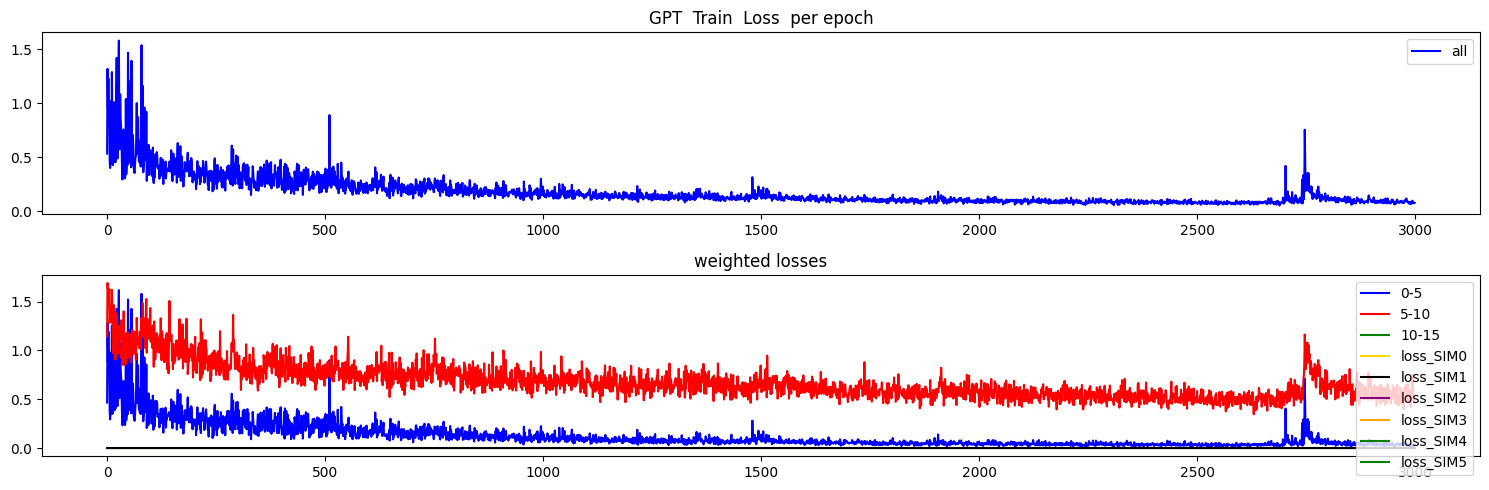

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


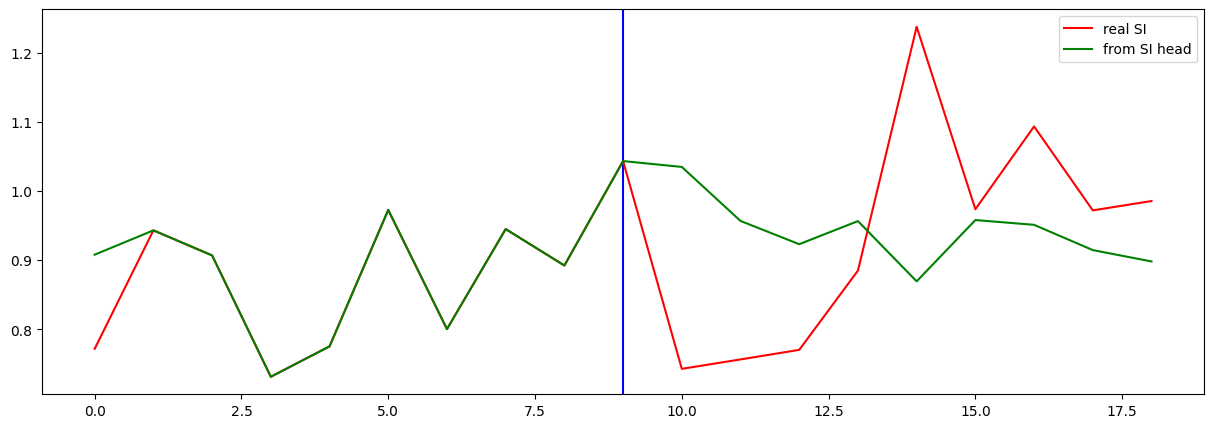

Testing R**2 - (all) - (no inputs):  0.983641994926865
Testing R**2 - (f2) - SI full (no inputs):  -0.2933239521181785
Testing R**2 - SI head only (no inputs):  -0.15830293933299577
0 ...index R**2 (no inputs):  0.01671410107551874
1 ...index R**2 (no inputs):  -0.3213343410775511
2 ...index R**2 (no inputs):  -0.2933239521181785
3 ...index R**2 (no inputs):  -1.19118554080501
4 ...index R**2 (no inputs):  -2.3219129634311155
5 ...index R**2 (no inputs):  -173.46397332531546
6 ...index R**2 (no inputs):  -3.383996166299265
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2168748645698002
10 ...index R**2 (no inputs):  -0.9238089009134434
11 ...index R**2 (no inputs):  -89.67120051510878
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9401919220907928
16 ...index R**2 (no inputs):  -0.21945220168770008
17 ...index R**2 (no inputs):  -215.58169181

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.943585
Loss_SI: 0.9196412563323975 Loss_all: 1.1590758562088013
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.279479
Loss_SI: 0.22679272294044495 Loss_all: 0.7536566257476807
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.176110
Loss_SI: 0.11967474222183228 Loss_all: 0.6840260624885559
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.128930
Loss_SI: 0.08042435348033905 Loss_all: 0.565479576587677
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.570009
Loss_SI: 0.5429521203041077 Loss_all: 0.8135188221931458
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.095215
Loss_SI: 0.04419860243797302 Loss_all: 0.5543619990348816
Prediction shape: torch.Size([32, 35])
===


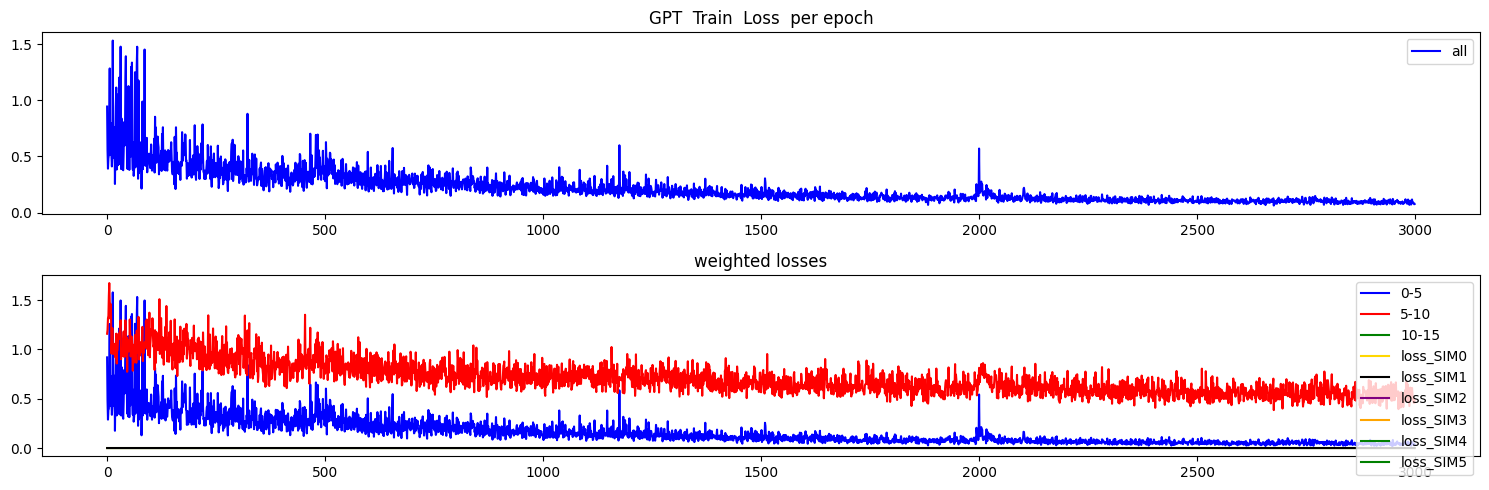

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


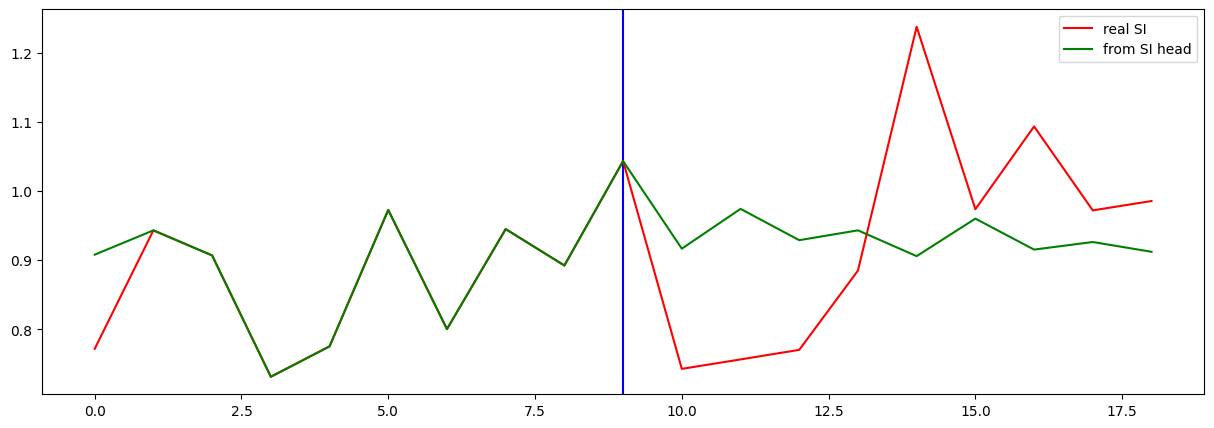

Testing R**2 - (all) - (no inputs):  0.9958773008622358
Testing R**2 - (f2) - SI full (no inputs):  0.14524469878247082
Testing R**2 - SI head only (no inputs):  0.02592752752863836
0 ...index R**2 (no inputs):  0.1595674196597079
1 ...index R**2 (no inputs):  -0.7946793709200088
2 ...index R**2 (no inputs):  0.14524469878247082
3 ...index R**2 (no inputs):  0.21239101290306062
4 ...index R**2 (no inputs):  -0.19358524761992846
5 ...index R**2 (no inputs):  -42.35961215198126
6 ...index R**2 (no inputs):  -2.5480176927289824
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19825476181213797
10 ...index R**2 (no inputs):  -0.9016788421554687
11 ...index R**2 (no inputs):  -9.725158728054566
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.018348623370121
16 ...index R**2 (no inputs):  -0.15092441707814896
17 ...index R**2 (no inputs):  -208.827459

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.643930
Loss_SI: 0.5941373109817505 Loss_all: 1.09206223487854
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.098454
Loss_SI: 0.03383708372712135 Loss_all: 0.6800083518028259
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.053790
Loss_SI: 0.017998769879341125 Loss_all: 0.3759140372276306
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.037380
Loss_SI: 0.0082174614071846 Loss_all: 0.2998468577861786
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.042920
Loss_SI: 0.009676214307546616 Loss_all: 0.34211522340774536
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.041564
Loss_SI: 0.011491217650473118 Loss_all: 0.3122146427631378
Prediction shape: torch.Size([32, 35])
===


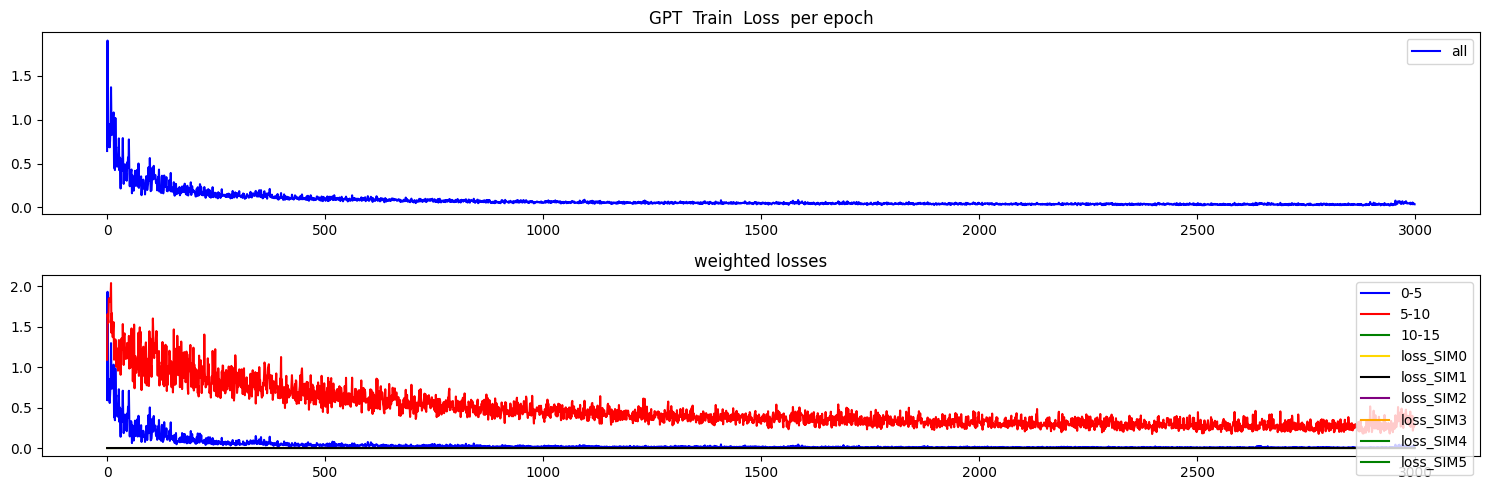

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


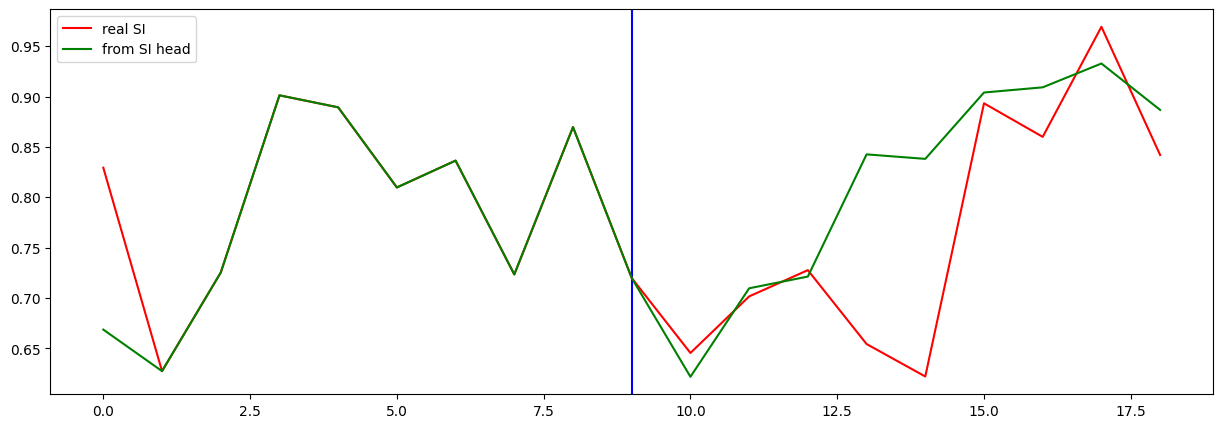

Testing R**2 - (all) - (no inputs):  0.9995320810032561
Testing R**2 - (f2) - SI full (no inputs):  -0.7796997364176745
Testing R**2 - SI head only (no inputs):  0.27493343342100074
0 ...index R**2 (no inputs):  -3.2128315439102355
1 ...index R**2 (no inputs):  -3.006762927011115
2 ...index R**2 (no inputs):  -0.7796997364176745
3 ...index R**2 (no inputs):  -2.3597055872579107
4 ...index R**2 (no inputs):  -0.5927244844363999
5 ...index R**2 (no inputs):  -7.73305853562602
6 ...index R**2 (no inputs):  -0.21523293079870642
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.6224960800698152
10 ...index R**2 (no inputs):  -0.18623741226363588
11 ...index R**2 (no inputs):  -8.798536275395817
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7039174091985756
16 ...index R**2 (no inputs):  -0.8737255302274758
17 ...index R**2 (no inputs):  -54.12401975

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.804112
Loss_SI: 0.7298622131347656 Loss_all: 1.4723602533340454
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.160516
Loss_SI: 0.10031520575284958 Loss_all: 0.7023195624351501
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.101701
Loss_SI: 0.04373754933476448 Loss_all: 0.623374342918396
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.087119
Loss_SI: 0.035876113921403885 Loss_all: 0.5483070611953735
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.066849
Loss_SI: 0.030798157677054405 Loss_all: 0.39130735397338867
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.061416
Loss_SI: 0.01690976694226265 Loss_all: 0.4619770050048828
Prediction shape: torch.Size([32, 35])
===


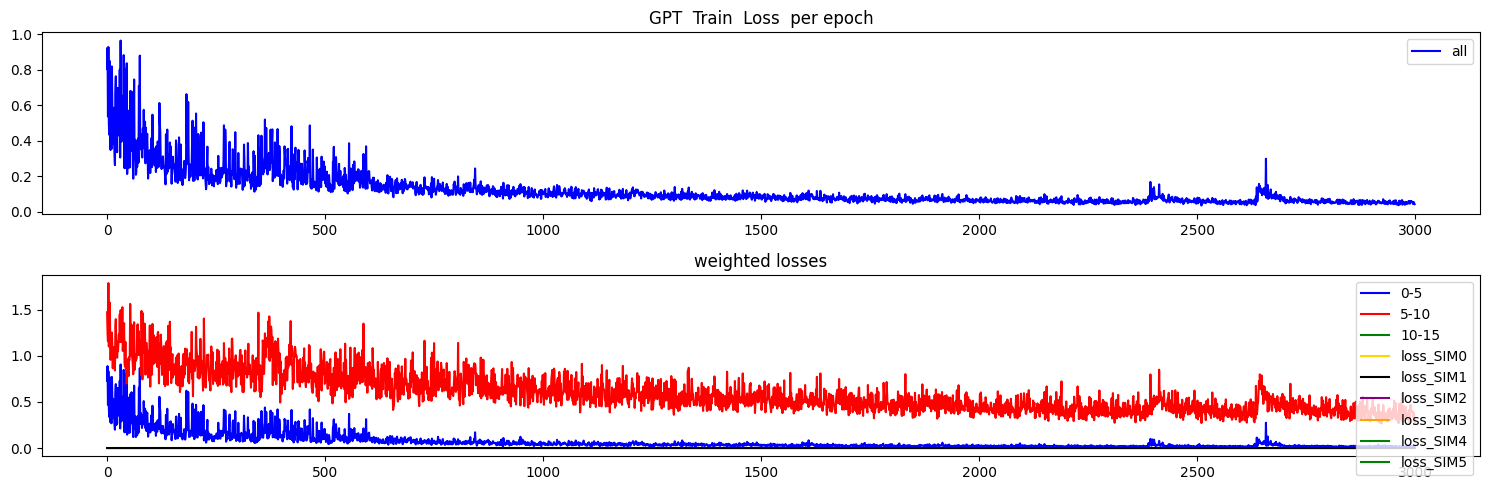

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


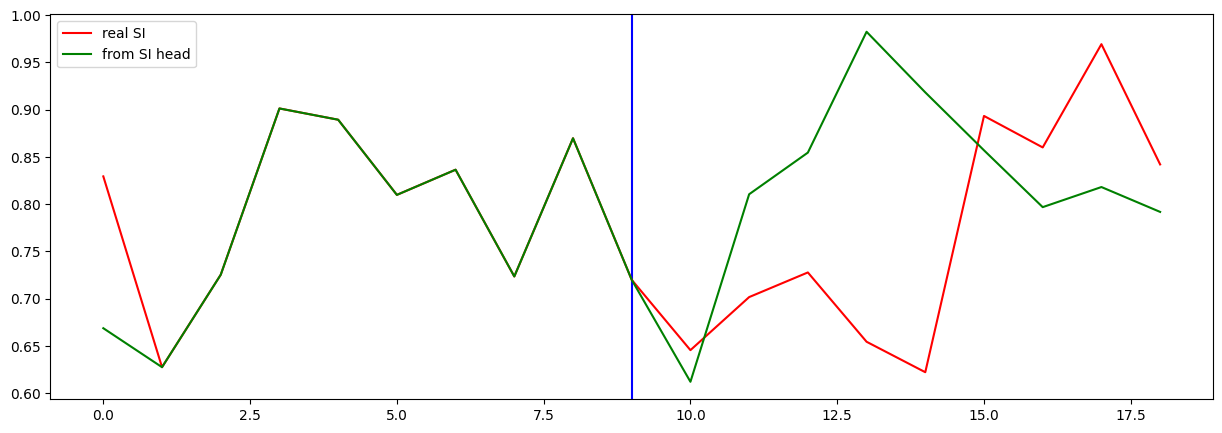

Testing R**2 - (all) - (no inputs):  0.9993792681018631
Testing R**2 - (f2) - SI full (no inputs):  -2.164345064343161
Testing R**2 - SI head only (no inputs):  -0.969428447755913
0 ...index R**2 (no inputs):  -1.6916462847864633
1 ...index R**2 (no inputs):  -7.078246392223779
2 ...index R**2 (no inputs):  -2.164345064343161
3 ...index R**2 (no inputs):  -6.807262792074599
4 ...index R**2 (no inputs):  -1.8730586563926859
5 ...index R**2 (no inputs):  -10.74930919675874
6 ...index R**2 (no inputs):  -1.2114854292376793
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.192237307965907
10 ...index R**2 (no inputs):  0.14793880303731544
11 ...index R**2 (no inputs):  -45.28782839902652
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0635501330971158
16 ...index R**2 (no inputs):  -2.0259560828777157
17 ...index R**2 (no inputs):  -8.253908120594291

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.369052
Loss_SI: 0.3165256977081299 Loss_all: 0.8417850136756897
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.177819
Loss_SI: 0.13172736763954163 Loss_all: 0.5926443934440613
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.133141
Loss_SI: 0.07812512665987015 Loss_all: 0.628287672996521
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.093830
Loss_SI: 0.0390293151140213 Loss_all: 0.5870348215103149
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.058658
Loss_SI: 0.021698331460356712 Loss_all: 0.39129096269607544
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.058315
Loss_SI: 0.02063354104757309 Loss_all: 0.3974444568157196
Prediction shape: torch.Size([32, 35])
===


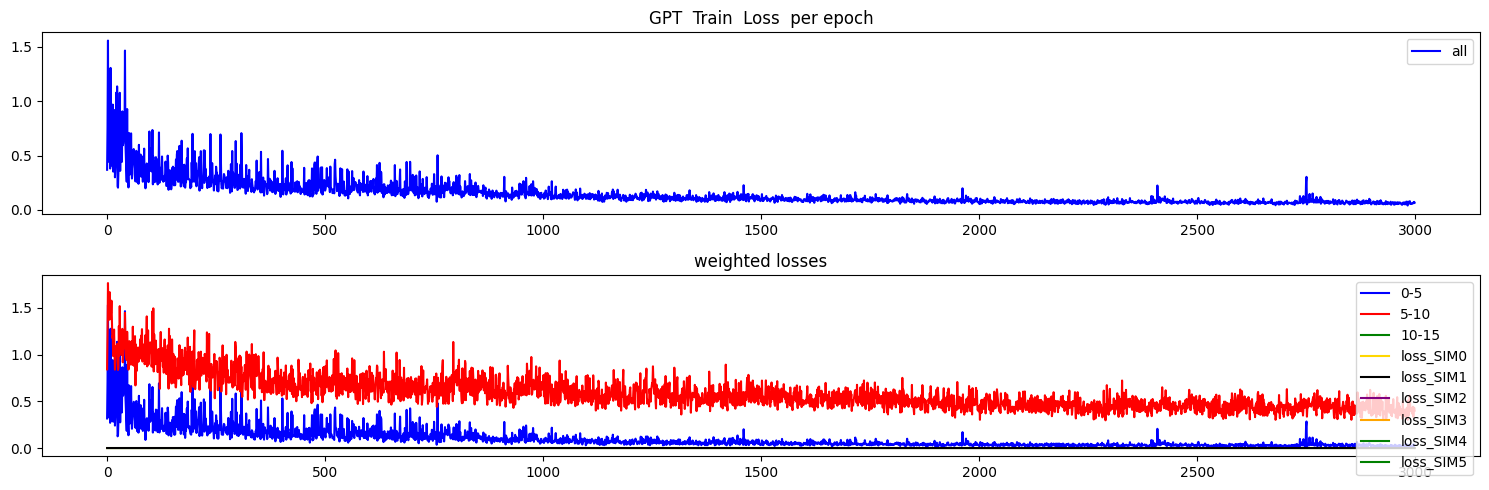

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


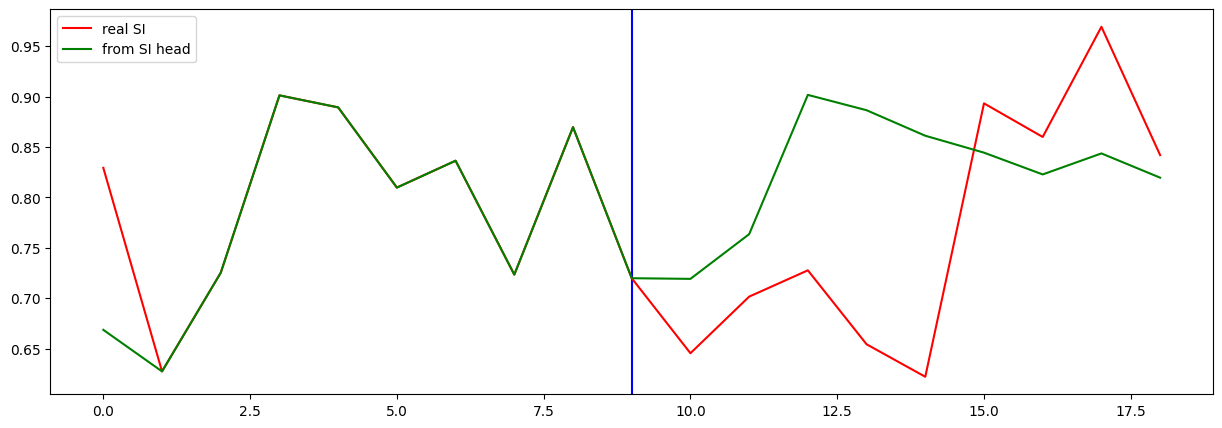

Testing R**2 - (all) - (no inputs):  0.9929008864841731
Testing R**2 - (f2) - SI full (no inputs):  -2.1861097153414777
Testing R**2 - SI head only (no inputs):  -0.410746184370556
0 ...index R**2 (no inputs):  -1.15931091472098
1 ...index R**2 (no inputs):  -7.559506305017965
2 ...index R**2 (no inputs):  -2.1861097153414777
3 ...index R**2 (no inputs):  -16.189371019386304
4 ...index R**2 (no inputs):  -24.83406018108978
5 ...index R**2 (no inputs):  -140.65291704972557
6 ...index R**2 (no inputs):  -0.19235872856799507
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5117102248293863
10 ...index R**2 (no inputs):  0.1513337466306035
11 ...index R**2 (no inputs):  -75.2668297199407
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4797328043808675
16 ...index R**2 (no inputs):  -12.757403263578514
17 ...index R**2 (no inputs):  -26.9314225221320

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.660408
Loss_SI: 1.6689854860305786 Loss_all: 1.583216667175293
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.315760
Loss_SI: 0.21611009538173676 Loss_all: 1.2126128673553467
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.169064
Loss_SI: 0.11311955749988556 Loss_all: 0.6725606918334961
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.162633
Loss_SI: 0.10455277562141418 Loss_all: 0.6853586435317993
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.097875
Loss_SI: 0.0584644190967083 Loss_all: 0.45256948471069336
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.098849
Loss_SI: 0.03060859441757202 Loss_all: 0.7130153775215149
Prediction shape: torch.Size([32, 35])
===


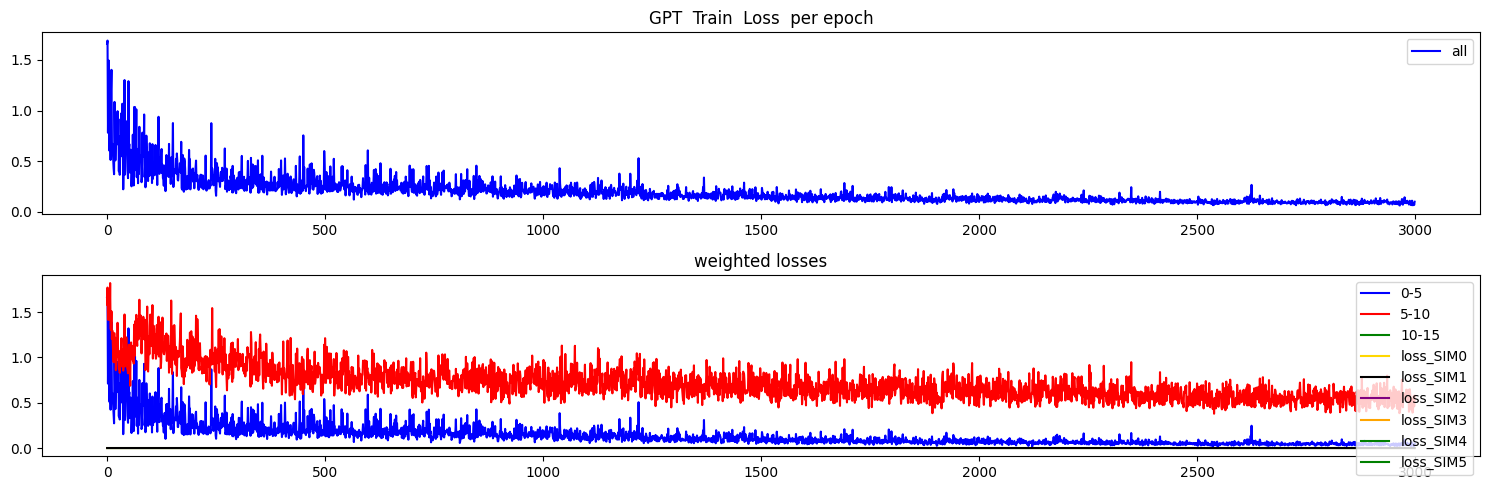

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


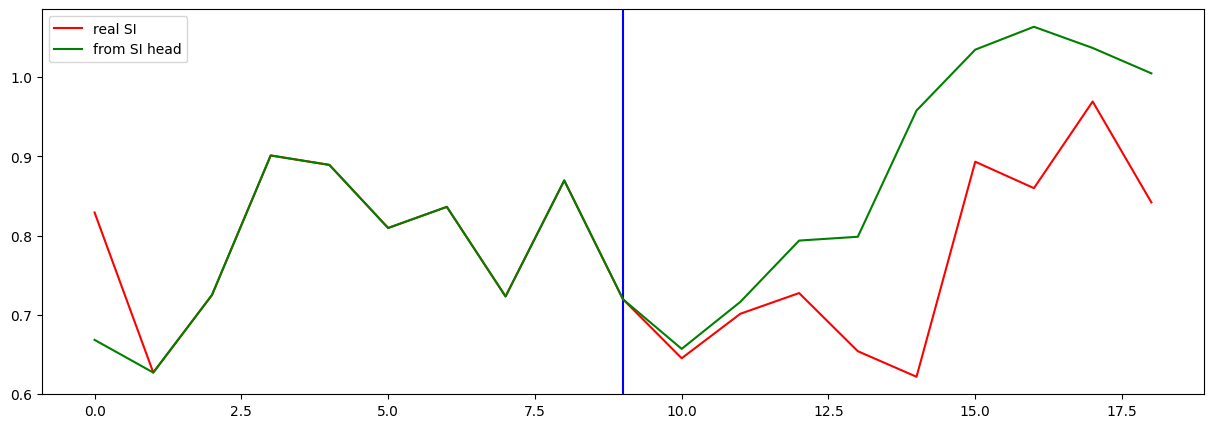

Testing R**2 - (all) - (no inputs):  0.9972021920092939
Testing R**2 - (f2) - SI full (no inputs):  -1.5986641014687266
Testing R**2 - SI head only (no inputs):  -0.49707950289910285
0 ...index R**2 (no inputs):  -0.12837389446588565
1 ...index R**2 (no inputs):  -3.4867570443048423
2 ...index R**2 (no inputs):  -1.5986641014687266
3 ...index R**2 (no inputs):  -19.29783207149398
4 ...index R**2 (no inputs):  -9.910014144533331
5 ...index R**2 (no inputs):  -52.58626468116085
6 ...index R**2 (no inputs):  -0.6959571855299778
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6658758507119911
10 ...index R**2 (no inputs):  0.03473726636253194
11 ...index R**2 (no inputs):  -4.213179605295375
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.537936145920222
16 ...index R**2 (no inputs):  -21.213967669269078
17 ...index R**2 (no inputs):  -806.3727112

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.792605
Loss_SI: 0.7376096248626709 Loss_all: 1.2875597476959229
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.122743
Loss_SI: 0.03885921090841293 Loss_all: 0.8776924014091492
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.073733
Loss_SI: 0.02667790651321411 Loss_all: 0.49723073840141296
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.053530
Loss_SI: 0.010586163029074669 Loss_all: 0.440024197101593
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.046288
Loss_SI: 0.01399369165301323 Loss_all: 0.3369392454624176
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.032919
Loss_SI: 0.00542848277837038 Loss_all: 0.2803380787372589
Prediction shape: torch.Size([32, 35])
===


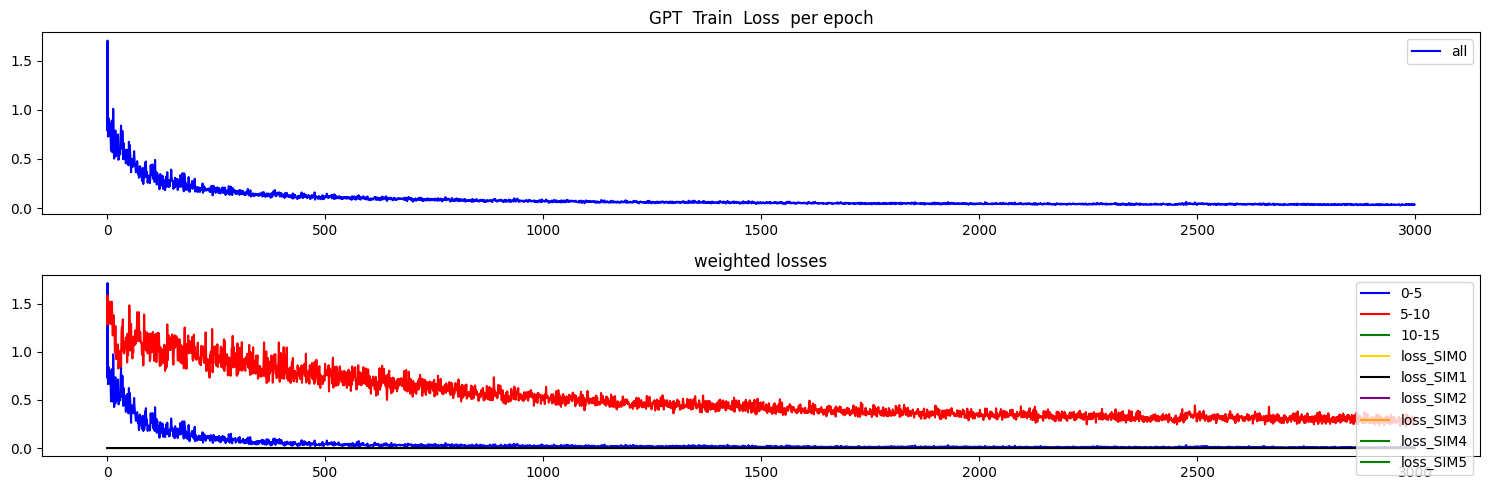

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


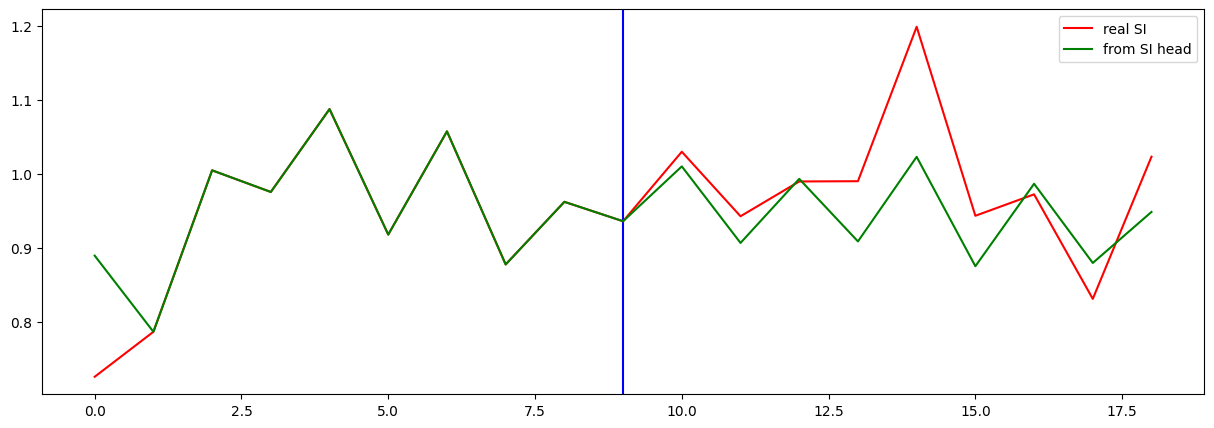

Testing R**2 - (all) - (no inputs):  0.993665897550949
Testing R**2 - (f2) - SI full (no inputs):  -0.5366278344562594
Testing R**2 - SI head only (no inputs):  -0.5251513372764527
0 ...index R**2 (no inputs):  -1.762768650516322
1 ...index R**2 (no inputs):  -0.12271602003966509
2 ...index R**2 (no inputs):  -0.5366278344562594
3 ...index R**2 (no inputs):  -0.978575533330529
4 ...index R**2 (no inputs):  -1.1346997346146876
5 ...index R**2 (no inputs):  -0.3777650710964666
6 ...index R**2 (no inputs):  -76.91268449401963
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09131009865384065
10 ...index R**2 (no inputs):  0.36754126047069213
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0019740709606086
16 ...index R**2 (no inputs):  -0.0007825102855691934
17 ...index R**2 (no inputs):  -55.771877415974934
18 ..

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.679726
Loss_SI: 0.6214137077331543 Loss_all: 1.2045360803604126
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.153629
Loss_SI: 0.07579032331705093 Loss_all: 0.8541730642318726
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.139084
Loss_SI: 0.07635893672704697 Loss_all: 0.7036131620407104
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.097864
Loss_SI: 0.0370074138045311 Loss_all: 0.6455754041671753
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.075178
Loss_SI: 0.025204168632626534 Loss_all: 0.5249428153038025
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.073863
Loss_SI: 0.02797754295170307 Loss_all: 0.4868369698524475
Prediction shape: torch.Size([32, 35])
===


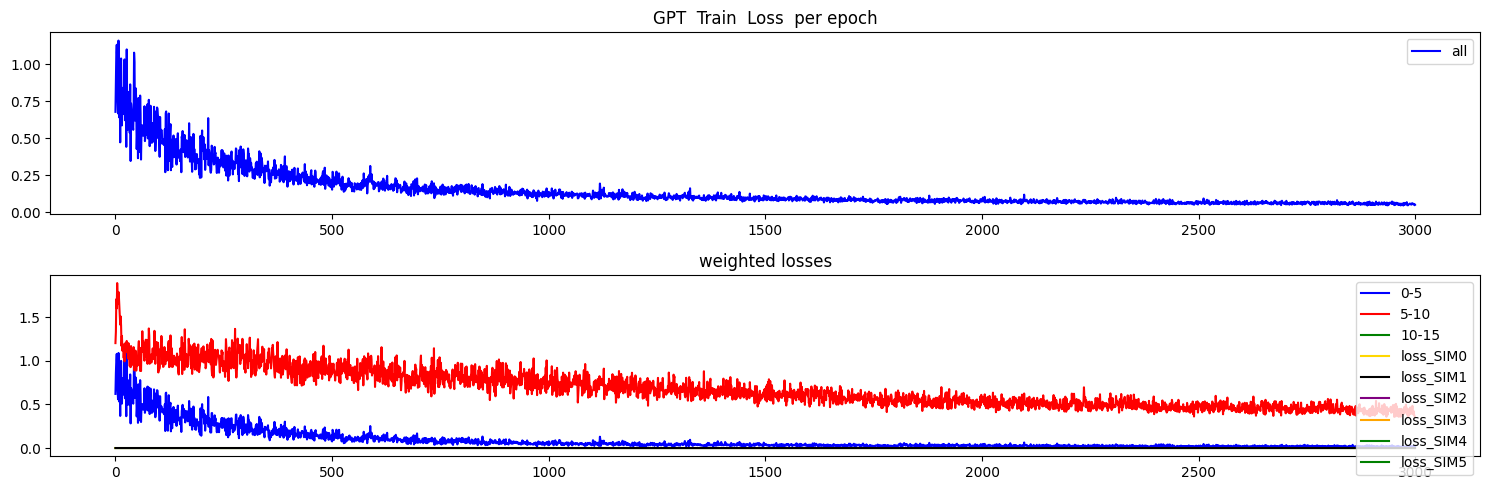

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


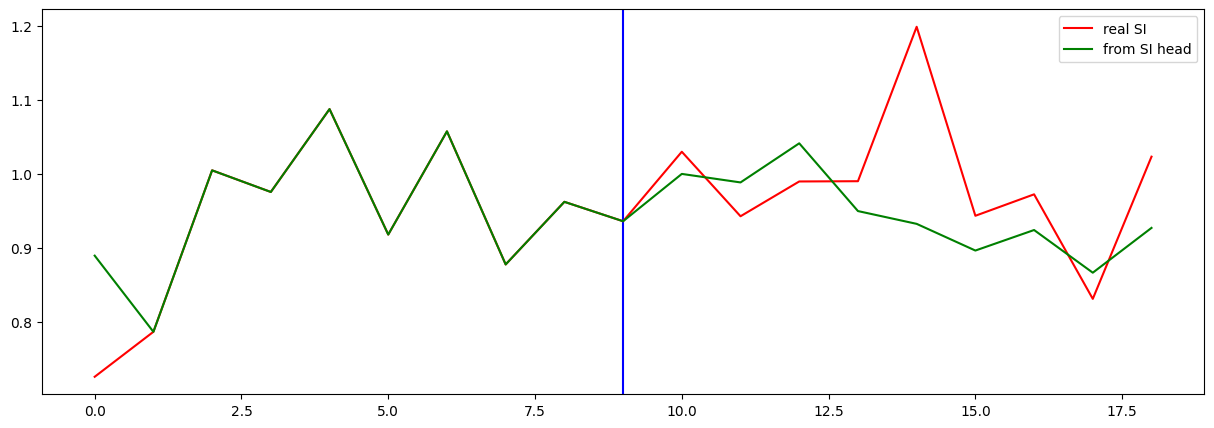

Testing R**2 - (all) - (no inputs):  0.9949478711746953
Testing R**2 - (f2) - SI full (no inputs):  -0.6212088263050366
Testing R**2 - SI head only (no inputs):  -0.0932700817034322
0 ...index R**2 (no inputs):  -1.0683522546580502
1 ...index R**2 (no inputs):  -0.40789572550481856
2 ...index R**2 (no inputs):  -0.6212088263050366
3 ...index R**2 (no inputs):  -2.7788308982779073
4 ...index R**2 (no inputs):  -0.6050932791054795
5 ...index R**2 (no inputs):  -0.020927426177342
6 ...index R**2 (no inputs):  -29.69723880662888
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3800165043561283
10 ...index R**2 (no inputs):  -0.6424900481984497
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3372106851930605
16 ...index R**2 (no inputs):  -0.5176092402966654
17 ...index R**2 (no inputs):  -66.73785953521728
18 ...in

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.802151
Loss_SI: 0.7534064054489136 Loss_all: 1.2408560514450073
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.260423
Loss_SI: 0.19346389174461365 Loss_all: 0.8630508184432983
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.176289
Loss_SI: 0.08917504549026489 Loss_all: 0.9603133797645569
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.089169
Loss_SI: 0.026298994198441505 Loss_all: 0.6549953818321228
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.105433
Loss_SI: 0.040107790380716324 Loss_all: 0.6933624744415283
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.069574
Loss_SI: 0.023622093722224236 Loss_all: 0.48313912749290466
Prediction shape: torch.Size([32, 35])
===


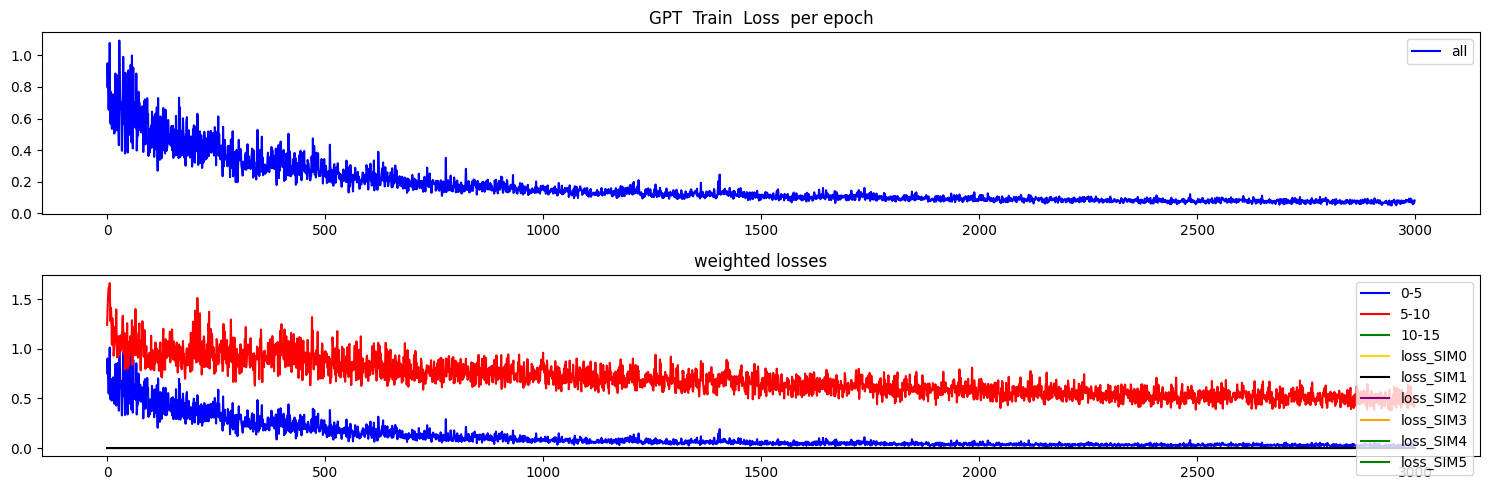

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


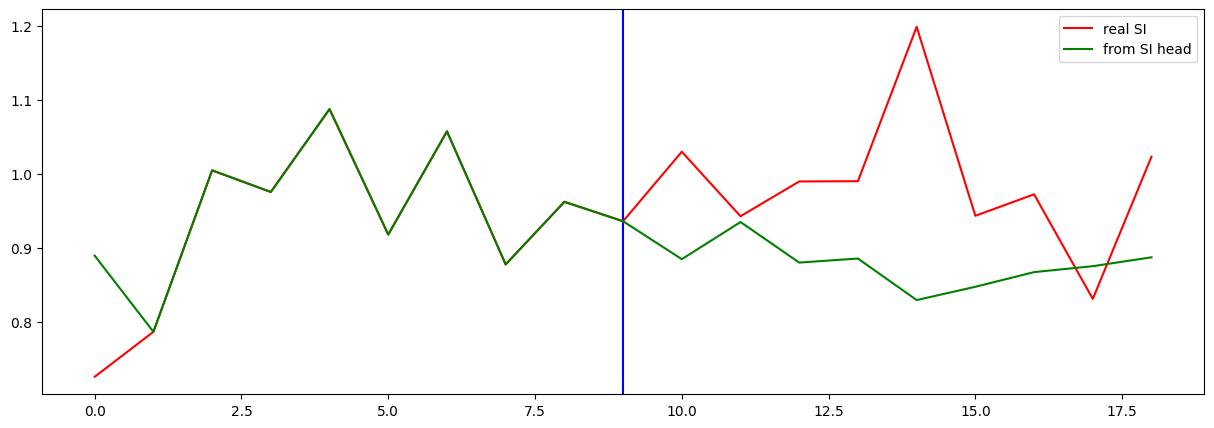

Testing R**2 - (all) - (no inputs):  0.9943090933132696
Testing R**2 - (f2) - SI full (no inputs):  -0.7379163604701857
Testing R**2 - SI head only (no inputs):  -0.4405238425759239
0 ...index R**2 (no inputs):  -0.12747166857590098
1 ...index R**2 (no inputs):  -0.5439446398641268
2 ...index R**2 (no inputs):  -0.7379163604701857
3 ...index R**2 (no inputs):  -9.437445470910383
4 ...index R**2 (no inputs):  -3.006213577844859
5 ...index R**2 (no inputs):  -0.18530687821714764
6 ...index R**2 (no inputs):  -70.92088098248124
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8798786414128852
10 ...index R**2 (no inputs):  -0.3195620575805347
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6150191526637552
16 ...index R**2 (no inputs):  -0.24567377699198234
17 ...index R**2 (no inputs):  -601.5949803670247
18 ...i

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.293407
Loss_SI: 1.3077549934387207 Loss_all: 1.164280652999878
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.238866
Loss_SI: 0.15984156727790833 Loss_all: 0.950088381767273
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.241446
Loss_SI: 0.17191587388515472 Loss_all: 0.8672221899032593
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.178662
Loss_SI: 0.11788654327392578 Loss_all: 0.7256413698196411
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.108088
Loss_SI: 0.03765159845352173 Loss_all: 0.742017924785614
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.098761
Loss_SI: 0.035890210419893265 Loss_all: 0.6645950078964233
Prediction shape: torch.Size([32, 35])
===


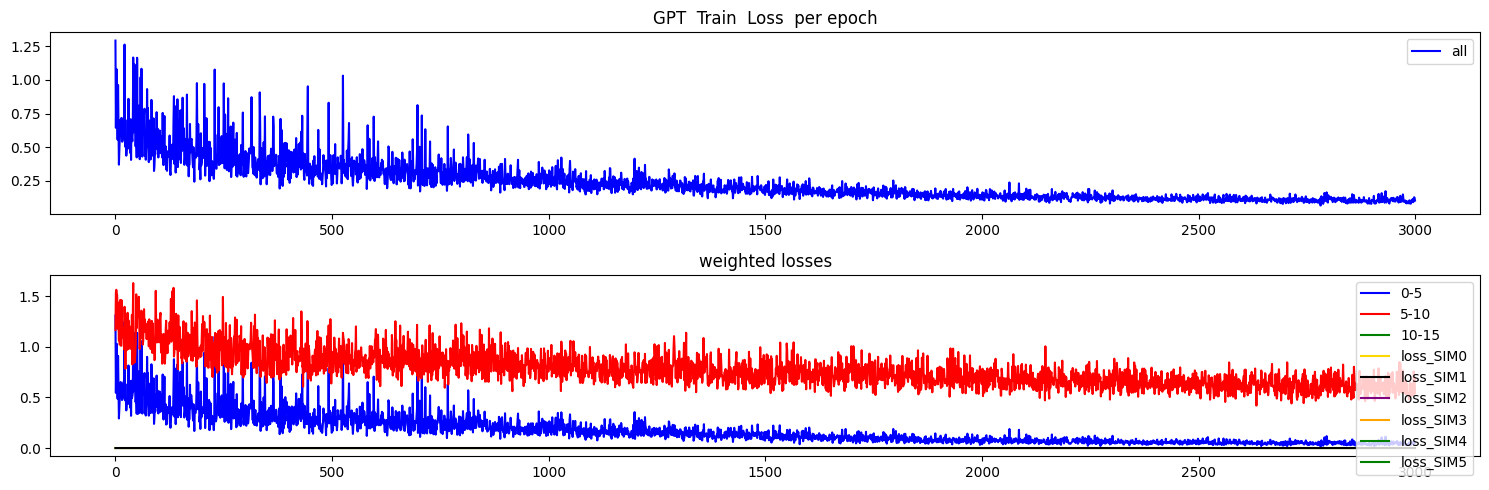

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


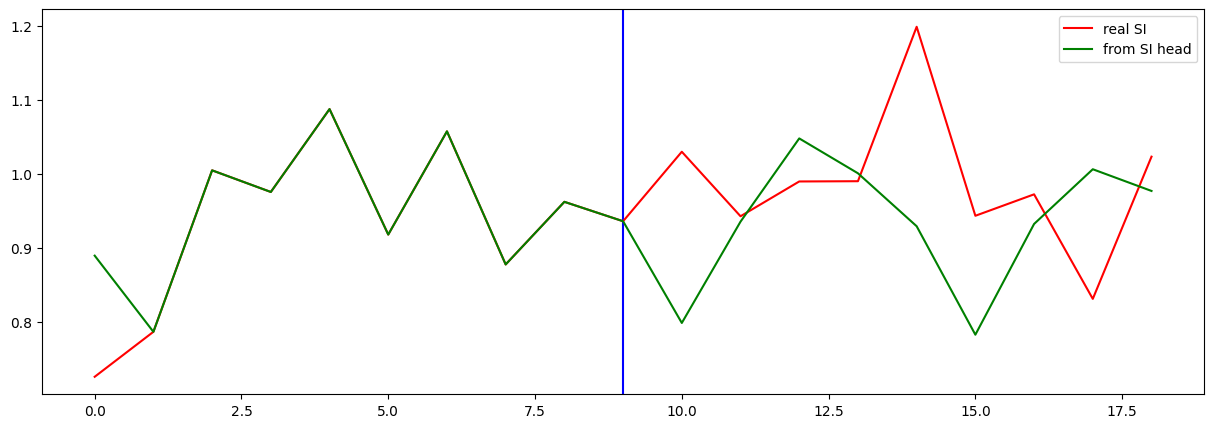

Testing R**2 - (all) - (no inputs):  0.9888123152383448
Testing R**2 - (f2) - SI full (no inputs):  -0.3634244898777528
Testing R**2 - SI head only (no inputs):  -0.3048021153836129
0 ...index R**2 (no inputs):  -0.43500465873127414
1 ...index R**2 (no inputs):  -2.258757472121485
2 ...index R**2 (no inputs):  -0.3634244898777528
3 ...index R**2 (no inputs):  -3.4786038528454313
4 ...index R**2 (no inputs):  -4.441460184743069
5 ...index R**2 (no inputs):  -1.7773690735850725
6 ...index R**2 (no inputs):  -101.35867970700242
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5792834486900369
10 ...index R**2 (no inputs):  0.14921150085548662
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.7808252339723665
16 ...index R**2 (no inputs):  -0.4104334356945496
17 ...index R**2 (no inputs):  -938.3278533935547
18 ...in

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.07590324973236484


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.23384067990908197


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.030543747538775756


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.14136791977457586



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.42630433700771586
2 .....R² on first n steps: 0.044138017679011377
3 .....R² on first n steps: 0.2775408377663027
4 .....R² on first n steps: 0.19267794789053116
5 .....R² on first n steps: 0.1332129899872142
6 .....R² on first n steps: 0.09127580807609603
7 .....R² on first n steps: 0.061779053246310944
8 .....R² on first n steps: 0.09180849514618905
9 .....R² on first n steps: 0.07590324973236484


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.5420202361569995
2 .....R² on first n steps: -0.31875417983096965
3 .....R² on first n steps: -0.19715131719807877
4 .....R² on first n steps: -0.13424427035544695
5 .....R² on first n steps: -0.20732694222295223
6 .....R² on first n steps: -0.21756846680213893
7 .....R² on first n steps: -0.29128098893379173
8 .....R² on first n steps: -0.23872666989057167
9 .....R² on first n steps: -0.23384067990908197


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -1.0629284692178094
2 .....R² on first n steps: -0.4259905359278635
3 .....R² on first n steps: -0.2748867306753018
4 .....R² on first n steps: 0.03973663592031951
5 .....R² on first n steps: 0.05382776849195381
6 .....R² on first n steps: 0.011997132180182501
7 .....R² on first n steps: -0.00877173654484098
8 .....R² on first n steps: 0.028657814547714655
9 .....R² on first n steps: 0.030543747538775756


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -0.4985416594663066
2 .....R² on first n steps: -0.6422548278518536
3 .....R² on first n steps: -0.3293737414827813
4 .....R² on first n steps: 0.3029288634163554
5 .....R² on first n steps: 0.254333834392075
6 .....R² on first n steps: 0.25586120642010934
7 .....R² on first n steps: 0.26147647168519816
8 .....R² on first n steps: 0.24147026184995413
9 .....R² on first n steps: 0.14136791977457586



## Plot


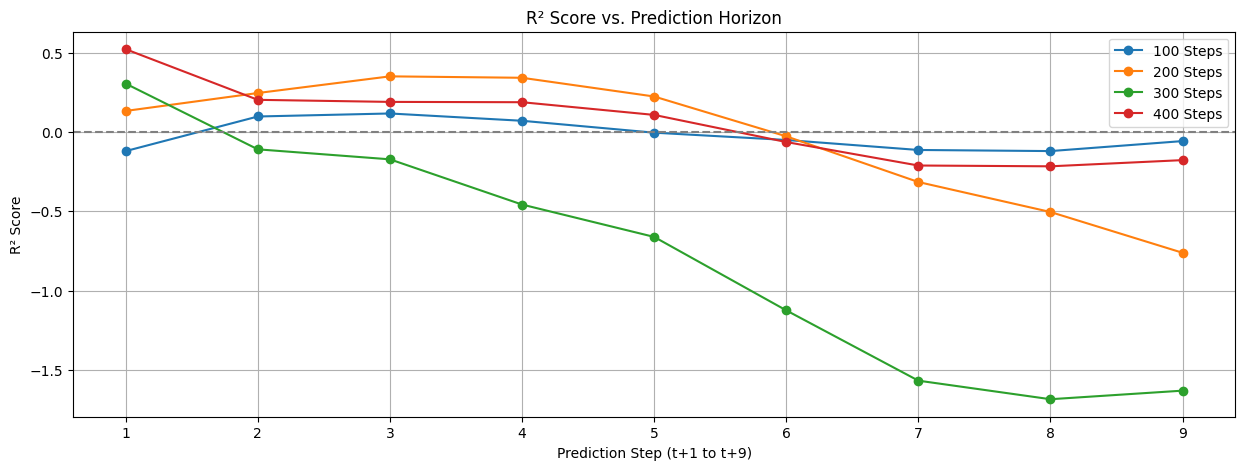

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
